# Anticipez les besoins en consommation électrique de bâtiments de la ville de Seattle

Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, Ce projet s’intéresse de près aux émissions des bâtiments non destinés à l’habitation de la ville de Seattle.  
Des relevés minutieux ont été effectués en 2015 et en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, nous voulons tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées.  
Nous cherchons également à évaluer l’intérêt de l’ENERGY STAR Score pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement.  

Dans cette première partie, nous allons réaliser une courte analyse exploratoire et nous allons nettoyer au fure et à mesure, les données si besoin. L'objectif sera de déterminer les variables pertinentes (variables target) ou d'en créer de nouvelles à partir de celles existantes (feature engineering).



## Sommaire:  
* [1. Analyse exploratoire](#1.)  
  
  * [1.1. Chargement et exploration des données](#1.1.)
  * [1.2. Etude de ressemblance entre variables](#1.2.) 
  * [1.3. décompactage et normalisation des variables imbriquées ](#1.3.)  
  * [1.4. Concaténation des deux dataframes ](#1.4.)  

* [2. Nettoyage des données](#2.)  
     * [A. Les variables qualitatives](#A)
  * [2.1. BuildingType](#2.1)
  * [2.2. Property type](#2.2)
  * [2.3. Outliers](#2.3)
  * [2.4. TaxParcelIdentificationNumber](#2.4) 
  * [2.5. Neighborhood](#2.5)
  * [2.6. YearsENERGYSTARCertified](#2.6)
  * [2.7. DefaultData](#2.7) 
  * [2.8. ComplianceStatus](#2.8)
  * [2.9. Address, City, State, CouncilDistrictCode ,Latitude, Longitude](#2.9) 
   
     * [B. Les variables quantitatives](#B)
  * [2.10. YearBuilt](#2.10)  
  * [2.11. Electricity / NaturalGas](#2.11)
  * [2.12. SiteEUIWN(kBtu/sf) - SourceEUIWN(kBtu/sf) - SiteEnergyUseWN(kBtu) ](#2.12)
  * [2.13. Distribution des variables quantitives](#2.13) 
  * [2.14. Vérification des lignes vides](#2.14)  
  

* [3. Analyse statistique](#3.)  

  * [3.1. Analyse univariée](#3.1) 
    * [A. Les variables qualitatives](#3.A)
    * [B. Les variables qualitatives](#3.A)
  * [3.2. Analyse multivariée](#3.2) 
    * [A. Codage](#3.a)
    * [B. Data leakage](#3.b) 
    * [C. Correlation](#3.C) 
    * [D. Pairplots](#3.d) 

## 1. Analyse exploratoire <a class="anchor" id="1."></a>  

### 1.1. Chargement et exploration des données <a class="anchor" id="1.1."></a>  


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import my_module

#### a) Exploration des données collectées en 2015

In [2]:
df_2015 = pd.read_csv ('2015-building-energy-benchmarking.csv')
df_2015.shape

(3340, 47)

In [3]:
pd.set_option('isplay.max_columns', 47)
df_2015.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [4]:
my_module.variable_survey(df_2015)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,OSEBuildingID,int64,3340,0.0 %
1,DataYear,int64,1,0.0 %
2,BuildingType,object,7,0.0 %
3,PrimaryPropertyType,object,27,0.0 %
4,PropertyName,object,3287,0.0 %
5,TaxParcelIdentificationNumber,object,3245,0.06 %
6,Location,object,3298,0.0 %
7,CouncilDistrictCode,int64,7,0.0 %
8,Neighborhood,object,13,0.0 %
9,YearBuilt,int64,113,0.0 %


<AxesSubplot:>

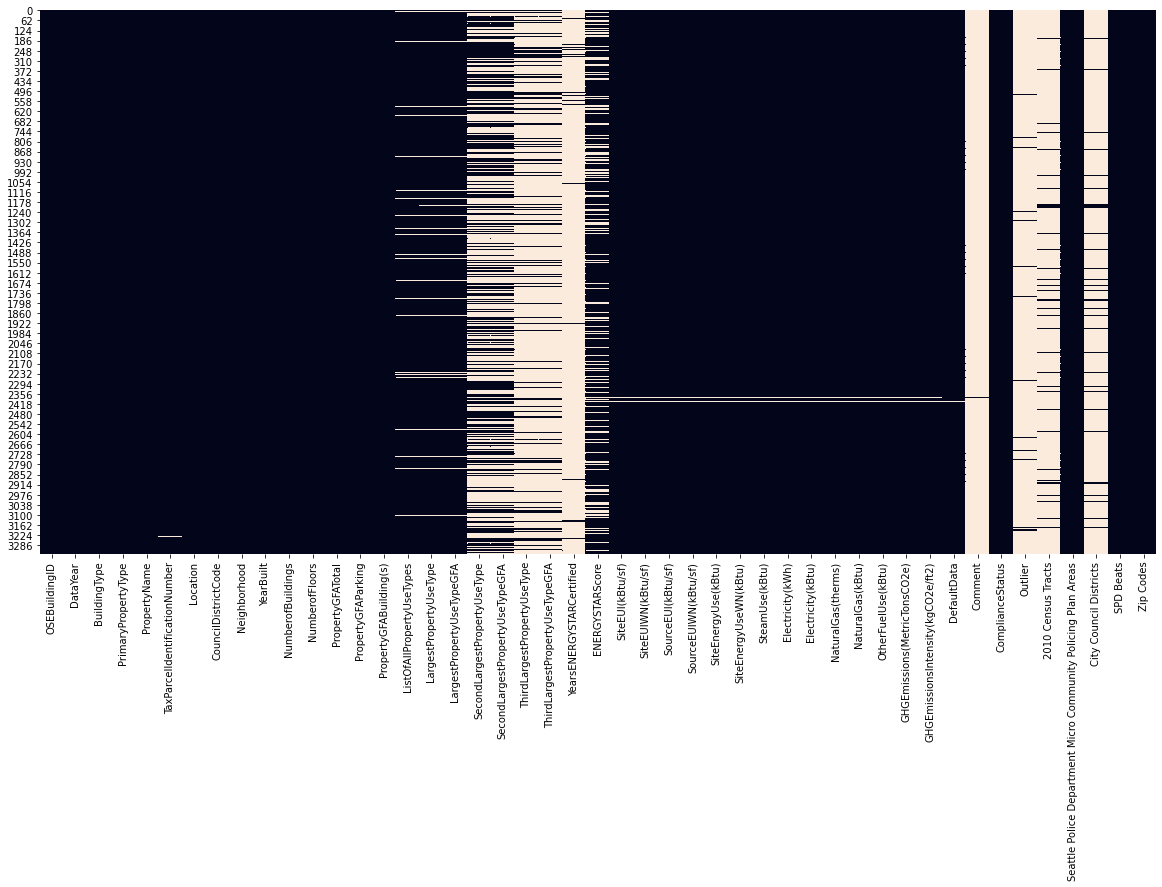

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(df_2015.isna(),cbar=False)

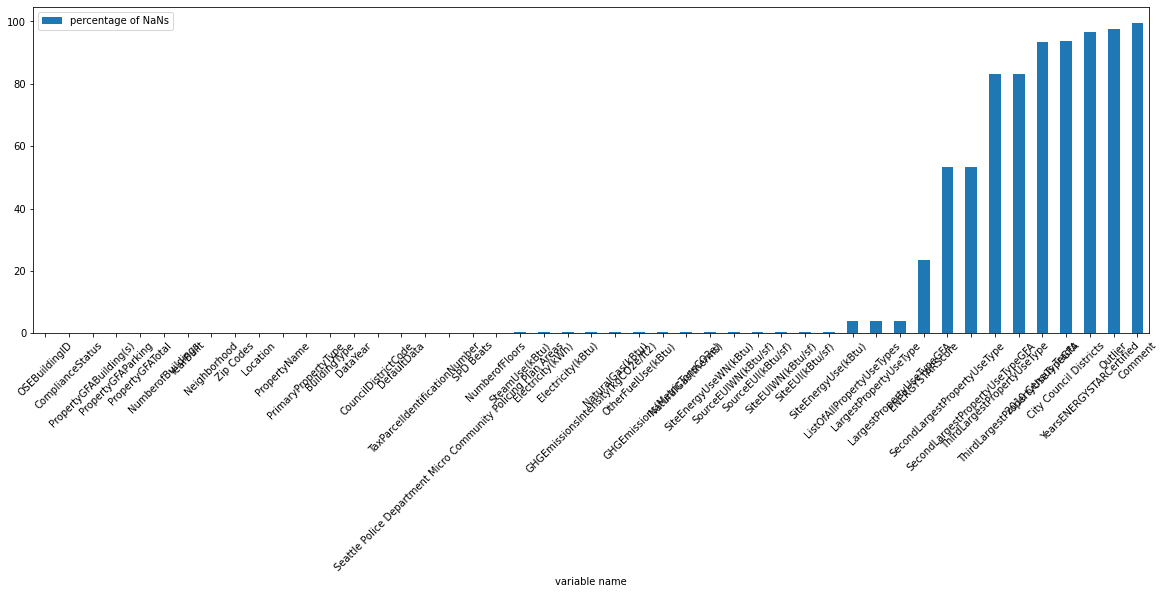

In [6]:
my_module.nans_df(df_2015)

#### b) Exploration des données collectées en 2016

In [7]:
df_2016=pd.read_csv('2016-building-energy-benchmarking.csv')
df_2016.shape

(3376, 46)

In [8]:
pd.set_option('isplay.max_columns', 46)
df_2016.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [9]:
my_module.variable_survey(df_2016)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,OSEBuildingID,int64,3376,0.0 %
1,DataYear,int64,1,0.0 %
2,BuildingType,object,8,0.0 %
3,PrimaryPropertyType,object,24,0.0 %
4,PropertyName,object,3362,0.0 %
5,Address,object,3354,0.0 %
6,City,object,1,0.0 %
7,State,object,1,0.0 %
8,ZipCode,float64,55,0.47 %
9,TaxParcelIdentificationNumber,object,3268,0.0 %


<AxesSubplot:>

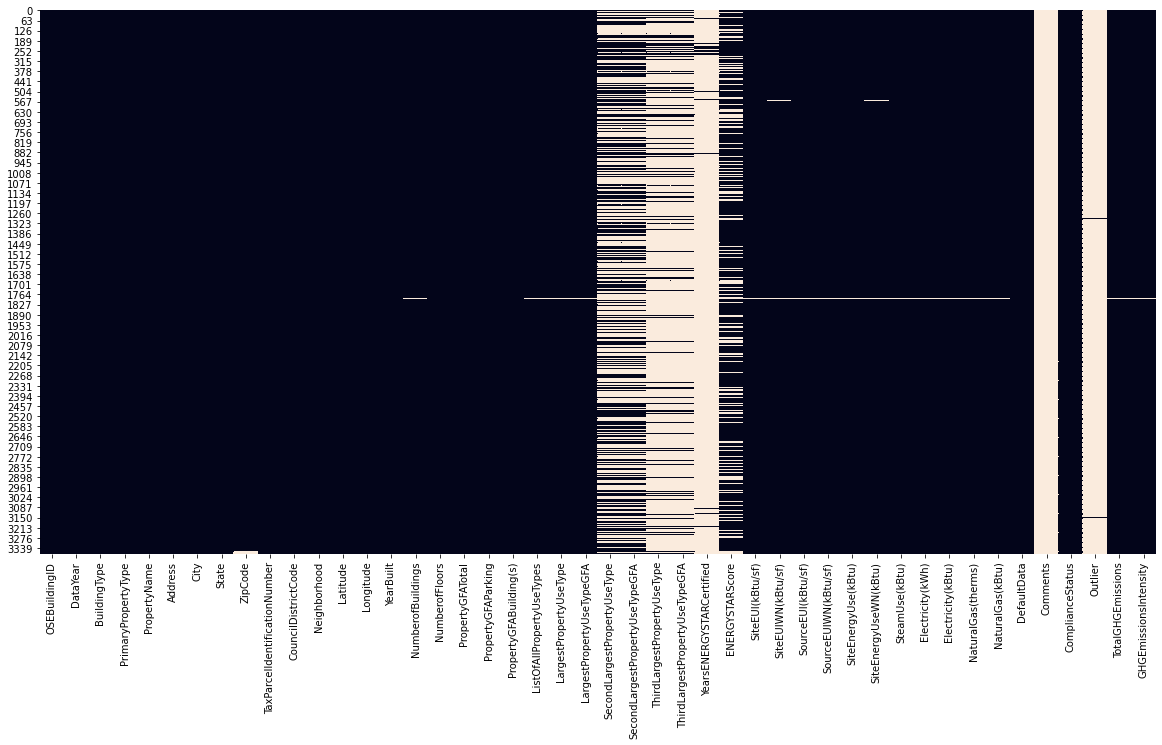

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df_2016.isna(),cbar=False)

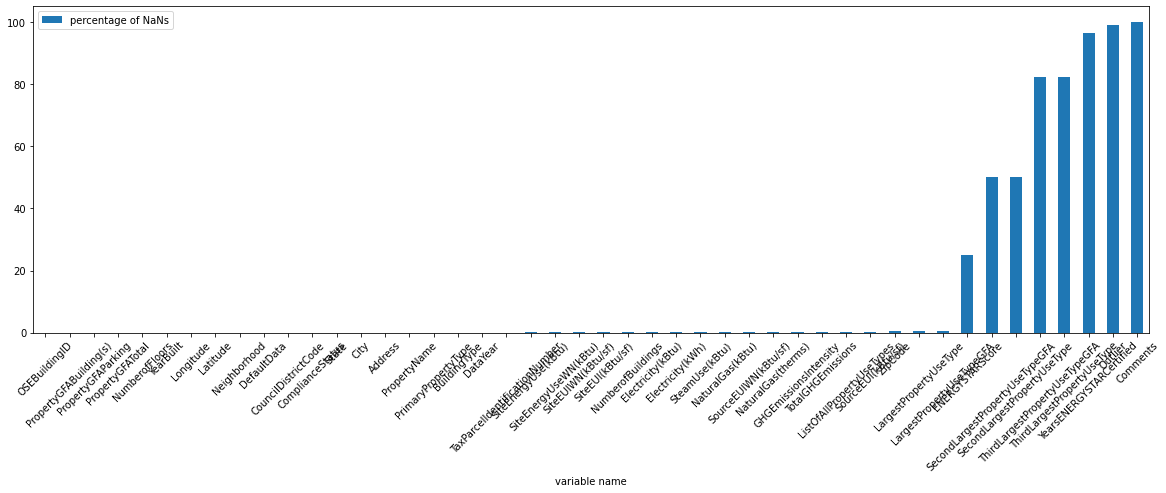

In [11]:
my_module.nans_df(df_2016)

In [12]:
dataset_dict={"df_2016":df_2016, "df_2015":df_2015}
my_module.dataframe_survey(dataset_dict)

,dataframe,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,df_2016,"(3376,46)",19952,12.85 %,0,0.0 %
1,df_2015,"(3340,47)",26512,16.89 %,0,0.0 %


   ### Remarques   
   - Nous remarquons que les datasets ne contiennent pas beaucoup de données manquantes (13% pour df_2016 et 17% pour df_2015)  
   - Ya pas de lignes redandantes pour les deux df.  
   - Nous remarquons qu'il y a des colonnes communes entre les deux df et d'autres qui sont spécifiques pour chaque df. Dans la suite, nous allons faire une analyse de l'intersection des colonnes entre les deux datasets. Le but c'est d'étudier la possibilité de concaténer les deux datasets. 

### 1.2. Etudes de ressemblance entre variables <a class="anchor" id="1.2."></a>  

In [13]:
#trouver les colonnes communes entre les deux df
col_2015 = df_2015.columns.to_list()
col_2016 = df_2016.columns.to_list()
commun_cols = list(set(col_2015) & set(col_2016))
len(commun_cols)

37

In [14]:
#trouver les colonnes qui sont présents dans df_2015 et non présents dans df_2016
extra_cols_2015 = [item for item in col_2015 if item not in col_2016]
extra_cols_2015

['Location',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Comment',
 '2010 Census Tracts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'City Council Districts',
 'SPD Beats',
 'Zip Codes']

In [15]:
#trouver les colonnes qui sont présents dans df_2016 et non présents dans df_2015
extra_cols_2016 = [item for item in col_2016 if item not in col_2015]
extra_cols_2016

['Address',
 'City',
 'State',
 'ZipCode',
 'Latitude',
 'Longitude',
 'Comments',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

### Remarques:  
-Nous remarquons qu'il y a des colonnes qui sont à prioris les mêmes mais leur noms est différents:  
  - couple 1: 'GHGEmissions(MetricTonsCO2e)'= 'TotalGHGEmissions'  
  - couple 2: 'GHGEmissionsIntensity(kgCO2e/ft2)'= 'GHGEmissionsIntensity'  
  - couple 3: 'Comment' = 'Comments'  
  - couple 4: 'Zip Codes' = 'ZipCode'  
 
 Vérifions, couple par couple, la discription statistique (en utilisant la fonction describe()) et les valeurs des variables.

#### Couple 1: 'GHGEmissions(MetricTonsCO2e)' / 'TotalGHGEmissions'
Green House Gaz

In [16]:
print(f"Description de la variable GHGEmissions(MetricTonsCO2e) 2015 : \n\n",df_2015['GHGEmissions(MetricTonsCO2e)'].describe(),
     f"\n\nDescription de la variable TotalGHGEmissions 2016 : \n\n", df_2016['TotalGHGEmissions'].describe())

Description de la variable GHGEmissions(MetricTonsCO2e) 2015 : 

 count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64 

Description de la variable TotalGHGEmissions 2016 : 

 count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64


/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


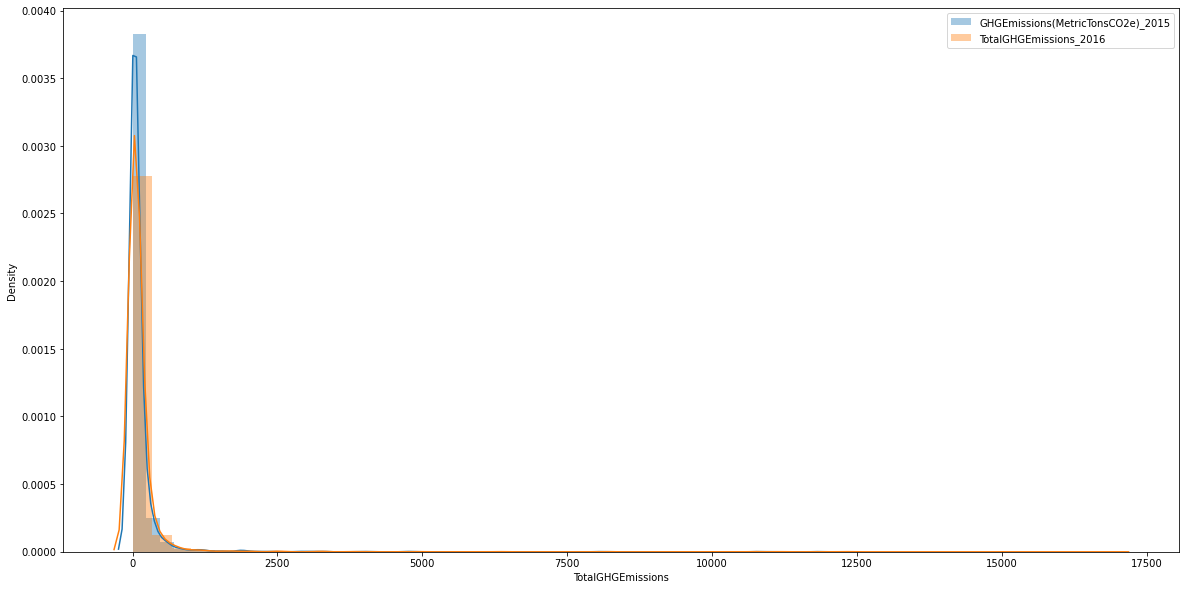

In [17]:
#comparer les deux variables par leur distributions
plt.figure(figsize=(20,10))
sns.distplot(df_2015['GHGEmissions(MetricTonsCO2e)'], label='GHGEmissions(MetricTonsCO2e)_2015')
sns.distplot(df_2016['TotalGHGEmissions'], label='TotalGHGEmissions_2016')
plt.legend()

**Conclusion:** Les deux variables semblent avoir la même échelle de valeurs. Nous allons donc just les renommer pour pouvoir après les merger. 

In [18]:
df_2015 = df_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions'})

#### Couple 2: 'GHGEmissionsIntensity(kgCO2e/ft2)'= 'GHGEmissionsIntensity' 

In [19]:
print (f"Description de la variable 'GHGEmissionsIntensity(kgCO2e/ft2) 2015: '\n\n", df_2015['GHGEmissionsIntensity(kgCO2e/ft2)'].describe(),
      f"\n\nDescription de la variable 'GHGEmissionsIntensity 2016: '\n\n", df_2016['GHGEmissionsIntensity'].describe() )

Description de la variable 'GHGEmissionsIntensity(kgCO2e/ft2) 2015: '

 count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64 

Description de la variable 'GHGEmissionsIntensity 2016: '

 count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000
25%         0.210000
50%         0.610000
75%         1.370000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64


/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


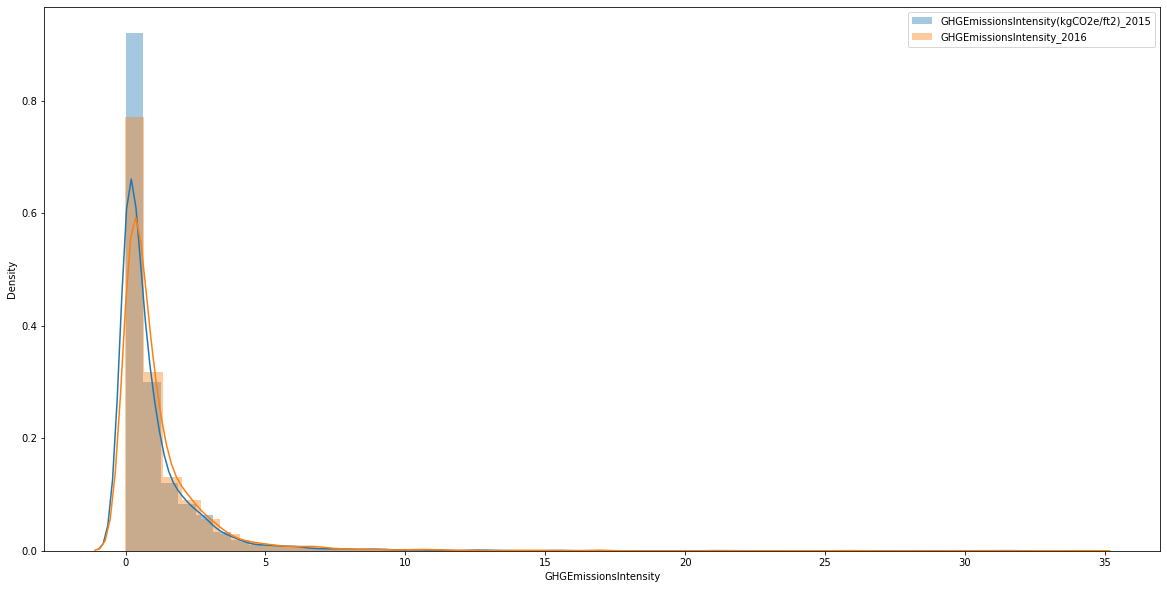

In [20]:
#comparer les deux variables par leur distributions
plt.figure(figsize=(20,10))
sns.distplot(df_2015['GHGEmissionsIntensity(kgCO2e/ft2)'], label='GHGEmissionsIntensity(kgCO2e/ft2)_2015')
sns.distplot(df_2016['GHGEmissionsIntensity'], label='GHGEmissionsIntensity_2016')
plt.legend()

**Conclusion:** Les deux variables semblent avoir la même échelle de valeurs. Nous allons donc just les renommer pour pouvoir après les merger. 

In [21]:
df_2015 = df_2015.rename(columns={'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity'})

#### Couple 3: 'Comment'= 'Comments' 

In [22]:
print (f"Description de la variable 'Comment 2015: '\n\n", df_2015['Comment'].describe(),
      f"\n\nDescription de la variable 'Comments 2016: '\n\n", df_2016['Comments'].describe() )

Description de la variable 'Comment 2015: '

 count                                                    13
unique                                                   13
top       Under construction starting 6/2013 (old buildi...
freq                                                      1
Name: Comment, dtype: object 

Description de la variable 'Comments 2016: '

 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Comments, dtype: float64


#### Remarque:  
 - Nous remarquons que les deux variables n'ont pas le même type (object en 2015 - float en 2016).  
 - C'est inutile de convertir le type de l'un des variables ensuite de le renommer, puisque ces deux variables sont presque vides (selon variable_survey(): en 2015 -->  99,61% NaN , en 2016 --> 100% NaN)  
   --> nous décidons donc de les supprimer


In [23]:
df_2016= df_2016.drop(['Comments'], axis = 1)
df_2015=df_2015.drop(['Comment'], axis = 1)

#### Couple 4 : 'Zip Codes' = 'ZipCode' 

Nous allons étudier la pressemblance entre ces deux variables plus tard.

Après avoir étudier la ressemblances des variables non communes entre df_2015 et df_2016, nous allons re-vérifier la liste des variables communes. 

In [24]:
col_2015 = df_2015.columns.to_list()
col_2016 = df_2016.columns.to_list()
extra_cols_2015 = [item for item in col_2015 if item not in col_2016]
extra_cols_2016 = [item for item in col_2016 if item not in col_2015]
print('extra_cols_2015 : \n\n', extra_cols_2015)
print('\nextra_cols_2016 : \n\n', extra_cols_2016)

extra_cols_2015 : 

 ['Location', 'OtherFuelUse(kBtu)', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes']

extra_cols_2016 : 

 ['Address', 'City', 'State', 'ZipCode', 'Latitude', 'Longitude']


## 1.3. Ressortir les variables imbriquées  <a class="anchor" id="1.3."></a>    
  
  Nous remarquons que les extra-variables dans df_2016 sont des informations qui concernent la localisation (Location en anglais). Vérifions ceci en affichant les valeurs de "Location" dans df_2015.

In [25]:
pd.set_option("max_colwidth", 1000)
df_2015['Location']

0         {'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
1           {'latitude': '47.61310583', 'longitude': '-122.33335756', 'human_address': '{"address": "724 PINE ST", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
2          {'latitude': '47.61334897', 'longitude': '-122.33769944', 'human_address': '{"address": "1900 5TH AVE", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
3        {'latitude': '47.61421585', 'longitude': '-122.33660889', 'human_address': '{"address": "620 STEWART ST", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
4           {'latitude': '47.6137544', 'longitude': '-122.3409238', 'human_address': '{"address": "401 LENORA ST", "city": "SEATTLE", "state": "WA", "zip": "98121"}'}
                                                                                     ...                                                                             

#### Remarque :  
On remarque que les données de localisation pour le jeu de données de 2015 sont "compactées" dans une sorte de double dictionnaire. Nous allons donc travailler cette variable pour extraire chacune des variables imbriquées (feature engineering)

In [26]:
#applatir 'Location' et créer d'autre colonnes contenant les variables imbriquées
import ast
df_2015['Location'] = [ast.literal_eval(str(item)) for index, item in df_2015.Location.iteritems()]
df_2015 = pd.concat([df_2015.drop(['Location'], axis=1), df_2015['Location'].apply(pd.Series)], axis=1)
df_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,...,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,latitude,longitude,human_address
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,...,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744,"{""address"": ""405 OLIVE WAY"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}"
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,...,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61310583,-122.33335756,"{""address"": ""724 PINE ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}"
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,...,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,Compliant,NaN,NaN,56.0,NaN,31.0,18081,47.61334897,-122.33769944,"{""address"": ""1900 5TH AVE"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}"
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,...,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081,47.61421585,-122.33660889,"{""address"": ""620 STEWART ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}"
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,...,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,Compliant,NaN,NaN,56.0,NaN,31.0,19576,47.6137544,-122.3409238,"{""address"": ""401 LENORA ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98121""}"


In [27]:
#applatir la variable 'human_address'
df_2015['human_address'] = [ast.literal_eval(str(item)) for index, item in df_2015.human_address.iteritems()]
df_2015['human_address'].apply(pd.Series)

,address,city,state,zip
0,405 OLIVE WAY,SEATTLE,WA,98101
1,724 PINE ST,SEATTLE,WA,98101
2,1900 5TH AVE,SEATTLE,WA,98101
3,620 STEWART ST,SEATTLE,WA,98101
4,401 LENORA ST,SEATTLE,WA,98121
...,...,...,...,...
3335,321 10TH AVE S,SEATTLE,WA,98104
3336,4123 12TH AVE NE,SEATTLE,WA,98105
3337,2030 8TH AVE,SEATTLE,WA,98121
3338,3801 NE 77TH ST,SEATTLE,WA,98115


In [28]:
#ajouter de nouvelles colonnes contenant les variables décompactées
df_2015 = pd.concat([df_2015.drop(['human_address'], axis=1), df_2015['human_address'].apply(pd.Series)], axis=1)
df_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,latitude,longitude,address,city,state,zip
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,...,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,...,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,...,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,Compliant,NaN,NaN,56.0,NaN,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,...,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,...,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,Compliant,NaN,NaN,56.0,NaN,31.0,19576,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121


In [29]:
#re-verifier l'extra variables (non communes) pour chaque df
col_2015 = df_2015.columns.to_list()
col_2016 = df_2016.columns.to_list()
extra_cols_2015 = [item for item in col_2015 if item not in col_2016]
extra_cols_2016 = [item for item in col_2016 if item not in col_2015]
print('extra_cols_2015 : \n\n', extra_cols_2015)
print('\nextra_cols_2016 : \n\n', extra_cols_2016)

extra_cols_2015 : 

 ['OtherFuelUse(kBtu)', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes', 'latitude', 'longitude', 'address', 'city', 'state', 'zip']

extra_cols_2016 : 

 ['Address', 'City', 'State', 'ZipCode', 'Latitude', 'Longitude']


Nous allons maintenant renommer les variables qui étaient imbriquées

In [30]:
df_2015 = df_2015.rename(columns={'address':'Address',
                                 'city':'City',
                                 'state':'State',
                                 'latitude':'Latitude',
                                 'longitude':'Longitude'})

In [31]:
#re-verifier l'extra variables (non communes) pour chaque df
col_2015 = df_2015.columns.to_list()
col_2016 = df_2016.columns.to_list()
extra_cols_2015 = [item for item in col_2015 if item not in col_2016]
extra_cols_2016 = [item for item in col_2016 if item not in col_2015]
print('extra_cols_2015 : \n\n', extra_cols_2015)
print('\nextra_cols_2016 : \n\n', extra_cols_2016)

extra_cols_2015 : 

 ['OtherFuelUse(kBtu)', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes', 'zip']

extra_cols_2016 : 

 ['ZipCode']


### Conclusion:  
Vérifions maintenant la possibilité de ressemblance de df_2015[zip] et df_2016[ZipCode] d'une part, et de df_2015[Zip Codes] et df_2016[ZipCode] d'autre part.



In [32]:
print(f'description de zip\n\n',df_2015['zip'].describe())
print(f'\n\ndescription de ZipCode\n\n',df_2016['ZipCode'].describe())

description de zip

 count      3340
unique       28
top       98109
freq        300
Name: zip, dtype: object


description de ZipCode

 count     3360.000000
mean     98116.949107
std         18.615205
min      98006.000000
25%      98105.000000
50%      98115.000000
75%      98122.000000
max      98272.000000
Name: ZipCode, dtype: float64


#### Remarque:  
Nous constatons que que 'zip' et 'ZipCode' n'ont pas le même type (object/float). Nous allons donc convertir le type du object vers float.

In [33]:
#conversion du type
df_2015['zip'] = df_2015['zip'].map(lambda x: float(x))
df_2015['zip'].describe()

count     3340.000000
mean     98116.737425
std         16.795145
min      98101.000000
25%      98105.000000
50%      98115.000000
75%      98122.000000
max      98199.000000
Name: zip, dtype: float64

In [34]:
# créer un liste contenant les batiments en commun entre 2015 et 2016
id_2015= df_2015['OSEBuildingID'].values
id_2016= df_2016['OSEBuildingID'].values
id_commun_list= [item for item in id_2015 if item in id_2016]
id_commun_list

[1,
 2,
 3,
 5,
 8,
 9,
 10,
 11,
 12,
 13,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 40,
 41,
 46,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 62,
 63,
 65,
 66,
 67,
 68,
 69,
 70,
 73,
 77,
 82,
 84,
 85,
 86,
 87,
 89,
 95,
 96,
 98,
 100,
 102,
 103,
 104,
 106,
 107,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 125,
 127,
 130,
 131,
 132,
 136,
 137,
 138,
 139,
 140,
 144,
 145,
 147,
 148,
 163,
 167,
 168,
 169,
 170,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 182,
 183,
 185,
 187,
 189,
 190,
 194,
 195,
 197,
 198,
 200,
 205,
 209,
 211,
 212,
 214,
 215,
 216,
 217,
 220,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 237,
 238,
 239,
 241,
 242,
 243,
 244,
 245,
 247,
 248,
 249,
 250,
 257,
 260,
 261,
 263,
 264,
 265,
 267,
 268,
 273,
 274,
 276,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 287

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


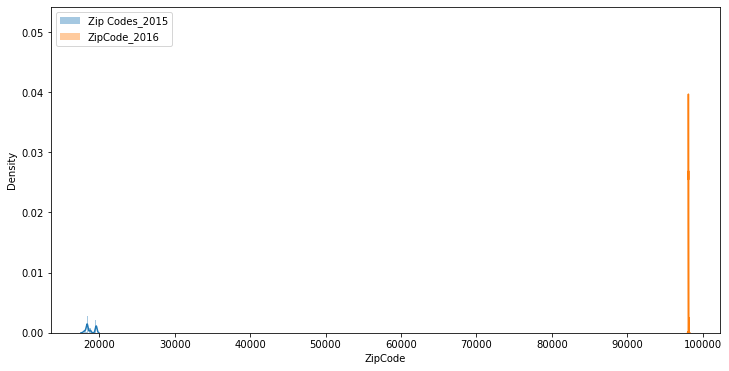

In [35]:
#comparer les distributions zip codes en 2015 et zipcode en 2016
plt.figure(figsize=(12,6))
sns.distplot(df_2015['Zip Codes'], label='Zip Codes_2015')
sns.distplot(df_2016['ZipCode'], label='ZipCode_2016')
plt.legend()

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


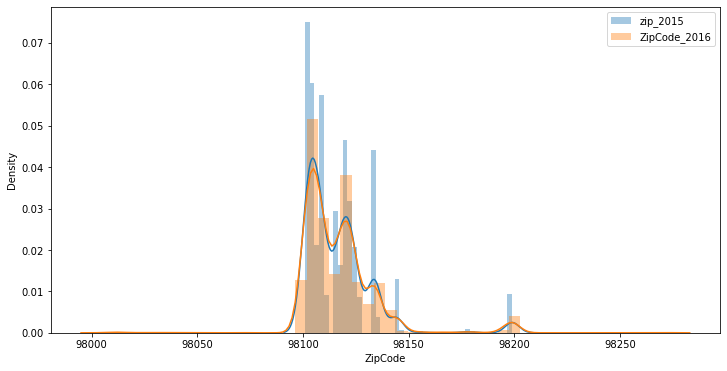

In [36]:
#comparer les distributions zip en 2015 et zipcode en 2016
plt.figure(figsize=(12,6))
sns.distplot(df_2015['zip'], label='zip_2015')
sns.distplot(df_2016['ZipCode'], label='ZipCode_2016')
plt.legend()

### Conclusion  
Nous constatons donc, d'après les distributions ci-dessus, que ZipCode dans 2016 et zip dans 2015 représentent presque la même variable (leurs distributions sont presque superposées). Nous allons donc leur attribuer le même nom et supprimer Zip Codes dans df_2015 puisqu'elle n'a pas d'équivalent dans df_2016. 

In [37]:
#renommer la variable ZipCode dans df_2016
df_2016 = df_2016.rename(columns={'ZipCode':'zip'})

In [38]:
#re-verifier l'extra variables (non communes) pour chaque df
col_2015 = df_2015.columns.to_list()
col_2016 = df_2016.columns.to_list()
extra_cols_2015 = [item for item in col_2015 if item not in col_2016]
extra_cols_2016 = [item for item in col_2016 if item not in col_2015]
print('extra_cols_2015 : \n\n', extra_cols_2015)
print('\nextra_cols_2016 : \n\n', extra_cols_2016)

extra_cols_2015 : 

 ['OtherFuelUse(kBtu)', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes']

extra_cols_2016 : 

 []


#### Conclusion:   
Nous allons supprimer les variables qui sont présents dans 2015 et qui n'ont pas d'équivalent en 2016.

In [39]:
df_2015 = df_2015.drop(columns=['OtherFuelUse(kBtu)', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes'])

In [40]:
#re-verifier l'extra variables (non communes) pour chaque df
col_2015 = df_2015.columns.to_list()
col_2016 = df_2016.columns.to_list()
extra_cols_2015 = [item for item in col_2015 if item not in col_2016]
extra_cols_2016 = [item for item in col_2016 if item not in col_2015]
print('extra_cols_2015 : \n\n', extra_cols_2015)
print('\nextra_cols_2016 : \n\n', extra_cols_2016)

extra_cols_2015 : 

 []

extra_cols_2016 : 

 []


## 1.4. Concaténation des deux dataframes <a class="anchor" id="1.4."></a>   
Maintenant que les deux dataframes sont normalisée, on pourra les concaténer.

In [41]:
all_data = pd.concat([df_2015,df_2016])
print(all_data.shape)
all_data.to_csv('data_rebuild.csv', index=False)


(6716, 45)


In [42]:
all_data = pd.read_csv('data_rebuild.csv')
all_data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,zip
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,No,Compliant,NaN,47.612190,-122.337997,405 OLIVE WAY,SEATTLE,WA,98101.0
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38,No,Compliant,NaN,47.613106,-122.333358,724 PINE ST,SEATTLE,WA,98101.0
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,2061.48,1.92,Yes,Compliant,NaN,47.613349,-122.337699,1900 5TH AVE,SEATTLE,WA,98101.0
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,1936.34,31.38,No,Compliant,High Outlier,47.614216,-122.336609,620 STEWART ST,SEATTLE,WA,98101.0
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,507.70,4.02,No,Compliant,NaN,47.613754,-122.340924,401 LENORA ST,SEATTLE,WA,98121.0


## 2. Nettoyage des données <a class="anchor" id="2."></a>    
Dans cette section nous aurons recourt à la documentation des variables pour mieux les comprendre. Le but est le prétraitement des données (feature engineering si besoin) pour l'étape de machine learning.   
Nous allons filtrer les données inutiles en se basant au début sur leurs pourcentage des valeurs manquantes, ensuite en se basant sur leur utilité selon l'objectif du projet. 
Nous commençons par le nettoyage des variables qualitatives ensuite les données quantitatives. 

In [43]:
#vérification des pourcentages des valeurs manquantes pour chaque variable
my_module.variable_survey(all_data)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,OSEBuildingID,int64,3432,0.0 %
1,DataYear,int64,2,0.0 %
2,BuildingType,object,8,0.0 %
3,PrimaryPropertyType,object,32,0.0 %
4,PropertyName,object,6527,0.0 %
5,TaxParcelIdentificationNumber,object,3729,0.03 %
6,CouncilDistrictCode,int64,7,0.0 %
7,Neighborhood,object,19,0.0 %
8,YearBuilt,int64,113,0.0 %
9,NumberofBuildings,float64,18,0.12 %


# A. Les variables qualitatives <a class="anchor" id="A"></a>     

In [44]:
#selectionner les variables qualitatives

qualitative_vars = ['BuildingType', 'PrimaryPropertyType','PropertyName','TaxParcelIdentificationNumber',\
                   'Neighborhood','ListOfAllPropertyUseTypes','LargestPropertyUseType','SecondLargestPropertyUseType',\
                   'ThirdLargestPropertyUseType','YearsENERGYSTARCertified', 'DefaultData','ComplianceStatus',\
                   'Outlier','Address','City','State']
len(qualitative_vars)

16

Tout d'abord, il faut uniformiser toutes les chaines de caractères (tous en majuscule). 

In [45]:
#convertir toute chaine de caractère en majuscule
all_data = all_data.apply(lambda x: x.astype(str).str.upper())

## 2.1. BuildingType 	 <a class="anchor" id="2.1"></a>     
Le but du projet restreint l'analyse aux bâtiments non destinés à l’habitation. Nous allons donc filtrer les habitations. Commençons par analyser leurs types. 

<AxesSubplot:ylabel='OSEBuildingID'>

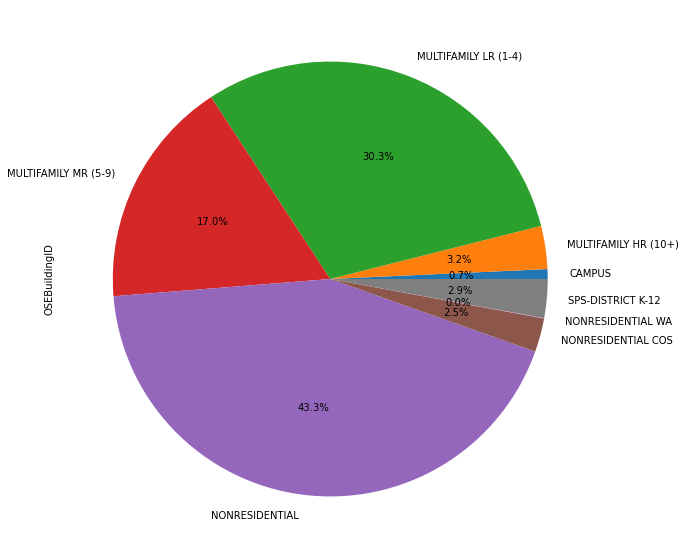

In [46]:
building_type = all_data.groupby(by='BuildingType')['OSEBuildingID'].nunique()
plt.figure(figsize=(12,10))
building_type.plot.pie(autopct="%1.1f%%")

### Remarques:  
Nous remarquons que la majorité des batiments (46%) sont de type non résidentiel. Nous allons filterer notre dataset pour ne garder que les batiment de type non résidentiel, ensuite, nous analysons leur type d'usage.

In [47]:
list=['NONRESIDENTIAL','NONRESIDENTIAL COS','NONRESIDENTIAL WA', 'CAMPUS']
all_data = all_data[all_data['BuildingType'].isin(list)]
all_data.shape

(3121, 45)

## 2.2. Property type <a class="anchor" id="2.2"></a>    

In [48]:
all_property_type= all_data['SecondLargestPropertyUseType'].unique().tolist()+\
all_data['LargestPropertyUseType'].unique().tolist()+\
all_data['ThirdLargestPropertyUseType'].unique().tolist()+\
all_data['PrimaryPropertyType'].unique().tolist()
print ('le nombre des types des propriétés total est: \n', len(all_property_type))

le nombre des types des propriétés total est: 
 176


In [49]:
#convertir la liste en set pour eliminer les doublons
unique_property =set(all_property_type)

In [50]:
# convert set to list
unique_property_list = [*unique_property]


In [51]:
print('le nombre des valeurs uniques est: ', len(unique_property_list), '\n\nla liste est :\n\n', unique_property_list)

le nombre des valeurs uniques est:  78 

la liste est :

 ['POLICE STATION', 'WAREHOUSE', 'SENIOR CARE COMMUNITY', 'MEDICAL OFFICE', 'BAR/NIGHTCLUB', 'HOSPITAL (GENERAL MEDICAL & SURGICAL)', 'PRISON/INCARCERATION', 'OFFICE', 'DISTRIBUTION CENTER\n', 'RESTAURANT', 'DATA CENTER', 'FAST FOOD RESTAURANT', 'RESIDENCE HALL', 'MANUFACTURING/INDUSTRIAL PLANT', 'OTHER - EDUCATION', 'MOVIE THEATER', 'OTHER - ENTERTAINMENT/PUBLIC ASSEMBLY', 'FOOD SERVICE', 'CONVENTION CENTER', 'NON-REFRIGERATED WAREHOUSE', 'K-12 SCHOOL', 'OTHER - LODGING/RESIDENTIAL', 'DISTRIBUTION CENTER', 'LARGE OFFICE', 'FITNESS CENTER/HEALTH CLUB/GYM', 'RESIDENTIAL CARE FACILITY', 'PERFORMING ARTS', 'REPAIR SERVICES (VEHICLE, SHOE, LOCKSMITH, ETC)', 'SUPERMARKET / GROCERY STORE', 'SWIMMING POOL', 'OTHER', 'SELF-STORAGE FACILITY\n', 'STRIP MALL', 'OTHER - MALL', 'OTHER - RECREATION', 'LIBRARY', 'WORSHIP FACILITY', 'MIXED USE PROPERTY', 'ADULT EDUCATION', 'REFRIGERATED WAREHOUSE', 'MULTIFAMILY HOUSING', 'WHOLESALE CLUB/SUPERCEN

#### Remarque:  
Nous remarquons que parmi la liste des types de proporiétés, il y a quelques uns qui sont de type résidentiel (LOW-RISE MULTIFAMILY , MULTIFAMILY HOUSING. Ils peuvent etre des propriétes mixtes. Nous allons donc supprimer les lignes contenant les propriétés dont leur PrimaryPropertyType ou leur LargestPropertyUseType contient le terme "MULTIFAMILY".

In [52]:
#verifier le nombre de lignes à supprimer
rows_to_delete = all_data[all_data['PrimaryPropertyType'].str.contains('FAMILY')|\
                             all_data['LargestPropertyUseType'].str.contains('FAMILY')]
print ("le nombre de lignes à supprimer est :", rows_to_delete.shape[0])
rows_to_delete

le nombre de lignes à supprimer est : 23


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,zip
163,264,2015,NONRESIDENTIAL,MIXED USE PROPERTY,TRIBECA CONDOS & STORE,8681450000,7,MAGNOLIA / QUEEN ANNE,2002,1.0,4.0,110785,39179,71606,"FINANCIAL OFFICE, MULTIFAMILY HOUSING, PARKING, RETAIL STORE, SUPERMARKET/GROCERY STORE",MULTIFAMILY HOUSING,58563.0,SUPERMARKET/GROCERY STORE,48520.0,PARKING,29839.0,NAN,NAN,95.8,99.4,293.5,303.5,10608788.0,11015204.0,0.0,2997659.0,10228437.0,3808.0,380776.0,91.53,0.43,NO,COMPLIANT,NAN,47.62392426,-122.35764313,516 1ST AVE W,SEATTLE,WA,98119.0
1170,21122,2015,NONRESIDENTIAL,MIXED USE PROPERTY,FREMONT COURT - EQUINOX,1972202755,6,LAKE UNION,2001,1.0,3.0,41827,9226,32601,"MULTIFAMILY HOUSING, OFFICE, OTHER - MALL, PARKING, RESTAURANT",MULTIFAMILY HOUSING,14273.0,OFFICE,14128.0,PARKING,9680.0,NAN,NAN,101.6,103.9,231.5,234.0,4248084.0,4345708.0,0.0,732395.0,2499034.0,17492.0,1749154.0,110.32,2.38,NO,COMPLIANT,NAN,47.65018452,-122.3493482,3420 FREMONT AVE N,SEATTLE,WA,98103.0
1311,21481,2015,CAMPUS,LOW-RISE MULTIFAMILY,SANITARY MARKET - MASTER CAMPUS FOR PIKE PLACE MARKET,1976200210,7,DOWNTOWN,1942,1.0,4.0,45500,0,45500,"BAR/NIGHTCLUB, FOOD SALES, MULTIFAMILY HOUSING, RESTAURANT, RETAIL STORE, SELF-STORAGE FACILITY",MULTIFAMILY HOUSING,22669.0,RETAIL STORE,10455.0,RESTAURANT,3668.0,NAN,NAN,87.1,87.1,273.6,273.6,3863772.0,3863772.0,0.0,1132407.0,3863933.0,0.0,0.0,26.94,0.23,NO,COMPLIANT,NAN,47.60921881,-122.3408095,1513 1ST AVE,SEATTLE,WA,98101.0
1858,23562,2015,NONRESIDENTIAL,MIXED USE PROPERTY,THE TRAVELERS HOTEL,8670450000,7,DOWNTOWN,1913,1.0,3.0,43878,0,43878,"MULTIFAMILY HOUSING, NON-REFRIGERATED WAREHOUSE, OFFICE, RETAIL STORE",MULTIFAMILY HOUSING,12000.0,OFFICE,8262.0,RETAIL STORE,6312.0,NAN,NAN,22.5,22.4,70.7,70.3,739662.0,735897.0,0.0,216782.0,739692.0,0.0,0.0,5.16,0.04,NO,COMPLIANT,NAN,47.60180041,-122.33520381,80 YESLER WAY,SEATTLE,WA,98104.0
2341,25222,2015,NONRESIDENTIAL,MIXED USE PROPERTY,OLIVE 8,6364000000,7,DOWNTOWN,2009,1.0,39.0,1074552,112124,962428,"HOTEL, MULTIFAMILY HOUSING, PARKING",MULTIFAMILY HOUSING,311521.0,HOTEL,303000.0,PARKING,141450.0,NAN,62.0,44.4,45.4,118.5,116.8,27273538.0,27898716.0,0.0,6192557.0,21129882.0,61445.0,6144534.0,473.63,0.36,NO,COMPLIANT,NAN,47.61356354,-122.33405304,737 OLIVE WAY,SEATTLE,WA,98101.0
2422,25522,2015,NONRESIDENTIAL,MIXED USE PROPERTY,YOUTH CARE,9191201460,4,NORTHEAST,1997,1.0,4.0,32282,6985,25297,"MULTIFAMILY HOUSING, OFFICE, OTHER, PARKING",MULTIFAMILY HOUSING,12600.0,PARKING,6985.0,OTHER,6576.0,NAN,NAN,57.2,64.2,133.9,144.4,1446455.0,1623130.0,0.0,262003.0,893992.0,5525.0,552500.0,35.58,0.98,NO,COMPLIANT,NAN,47.66821286,-122.2998974,5401 26TH AVE NE,SEATTLE,WA,98105.0
2481,25674,2015,NONRESIDENTIAL,LOW-RISE MULTIFAMILY,COMET TAVERN,6003500480,3,EAST,1910,1.0,3.0,32100,0,32100,"BAR/NIGHTCLUB, MULTIFAMILY HOUSING",MULTIFAMILY HOUSING,21400.0,BAR/NIGHTCLUB,10700.0,NAN,NAN,NAN,NAN,2.9,2.9,3.5,3.5,93851.0,93851.0,0.0,1929.0,6581.0,873.0,87270.0,4.68,0.14,NO,COMPLIANT,NAN,47.61432913,-122.3197623,916 E PIKE ST,SEATTLE,WA,98122.0
2781,26834,2015,NONRESIDENTIAL,MIXED USE PROPERTY,SOO YUEN ASSOCIATION BUILDING (OHIO APTS.),5247801900,2,DOWNTOWN,1909,1.0,3.0,20620,0,20620,"MULTIFAMILY HOUSING, RETAIL STORE, SOCIAL/MEETING HALL",MULTIFAMILY HOUSING,10060.0,RETAIL STO

In [53]:
#drop les colonnes contenant les anomlaies
clean_df = all_data.drop(rows_to_delete.index)

In [54]:
#vérifier le shape du dataframe après 
clean_df.shape

(3098, 45)

In [55]:
#revérifier toutes les propriétés 

all_property_type= clean_df['SecondLargestPropertyUseType'].unique().tolist()+\
clean_df['LargestPropertyUseType'].unique().tolist()+\
clean_df['ThirdLargestPropertyUseType'].unique().tolist()+\
clean_df['PrimaryPropertyType'].unique().tolist()
print ('le nombre des types des propriétés total est: \n', len(all_property_type))

#convertir la liste en set pour eliminer les doublons
unique_property =set(all_property_type)

# convert set to list
unique_property_list = [*unique_property]
print('le nombre des valeurs uniques est: ', len(unique_property_list), '\n\nla liste est :\n\n', unique_property_list)

le nombre des types des propriétés total est: 
 174
le nombre des valeurs uniques est:  77 

la liste est :

 ['POLICE STATION', 'WAREHOUSE', 'SENIOR CARE COMMUNITY', 'MEDICAL OFFICE', 'BAR/NIGHTCLUB', 'HOSPITAL (GENERAL MEDICAL & SURGICAL)', 'PRISON/INCARCERATION', 'OFFICE', 'DISTRIBUTION CENTER\n', 'RESTAURANT', 'DATA CENTER', 'FAST FOOD RESTAURANT', 'RESIDENCE HALL', 'MANUFACTURING/INDUSTRIAL PLANT', 'OTHER - EDUCATION', 'MOVIE THEATER', 'OTHER - ENTERTAINMENT/PUBLIC ASSEMBLY', 'FOOD SERVICE', 'CONVENTION CENTER', 'NON-REFRIGERATED WAREHOUSE', 'K-12 SCHOOL', 'OTHER - LODGING/RESIDENTIAL', 'DISTRIBUTION CENTER', 'LARGE OFFICE', 'FITNESS CENTER/HEALTH CLUB/GYM', 'RESIDENTIAL CARE FACILITY', 'PERFORMING ARTS', 'REPAIR SERVICES (VEHICLE, SHOE, LOCKSMITH, ETC)', 'SUPERMARKET / GROCERY STORE', 'SWIMMING POOL', 'OTHER', 'SELF-STORAGE FACILITY\n', 'STRIP MALL', 'OTHER - MALL', 'OTHER - RECREATION', 'LIBRARY', 'WORSHIP FACILITY', 'MIXED USE PROPERTY', 'ADULT EDUCATION', 'REFRIGERATED WAREHOU

### Remarque  
Nous avons éliminé les doublons, d'où le nombre de type de propriétés est passé de 174 à 77. Nous allons maintenant creer des superclasses afin de diminuer encore leur nombre. Notre but est de préparer les données pour le décodage plus tard. 

In [56]:
#creer un dictionnaire pour regrouper les différents types de propritetes sous des sub-classes
subclass_dict={'HOTEL': ['RESIDENCE HALL','RESIDENCE HALL/DORMITORY','HOTEL','OTHER - LODGING/RESIDENTIAL'],\
              'EDUCATION': ['MULTIFAMILY HOUSING','VOCATIONAL SCHOOL','UNIVERSITY','SPS-DISTRICT K-12','PRE-SCHOOL/DAYCARE','ADULT EDUCATION', 'COLLEGE/UNIVERSITY','K-12 SCHOOL','OTHER - EDUCATION'],\
              'RESTAURANT': ['RESTAURANT\n','RESTAURANT','BAR/NIGHTCLUB','FAST FOOD RESTAURANT','FOOD SALES','FOOD SERVICE','OTHER - RESTAURANT/BAR'],\
              'STORE':['AUTOMOBILE DEALERSHIP','WHOLESALE CLUB/SUPERCENTER','SUPERMARKET/GROCERY STORE','SUPERMARKET / GROCERY STORE','RETAIL STORE','CONVENIENCE STORE WITHOUT GAS STATION','MIXED USE PROPERTY'],\
              'PUBLIC_SERVICE': ['DATA CENTER','NAN','FIRE STATION','WORSHIP FACILITY','SENIOR CARE COMMUNITY','REPAIR SERVICES (VEHICLE, SHOE, LOCKSMITH, ETC)','PRISON/INCARCERATION','POLICE STATION','PARKING','OTHER - UTILITY','BANK BRANCH','CONVENTION CENTER','COURTHOUSE','OTHER - PUBLIC SERVICES','OTHER - SERVICES','OTHER - TECHNOLOGY/SCIENCE'],\
              'ENTERTAINMENT': ['SWIMMING POOL','SOCIAL/MEETING HALL','PERFORMING ARTS','LIBRARY','MOVIE THEATER','MUSEUM','OTHER - ENTERTAINMENT/PUBLIC ASSEMBLY','OTHER - RECREATION'],\
              'WAREHOUSE':['WAREHOUSE','SELF-STORAGE FACILITY\n','SELF-STORAGE FACILITY','DISTRIBUTION CENTER','DISTRIBUTION CENTER\n','NON-REFRIGERATED WAREHOUSE'],\
              'MALL':['ENCLOSED MALL','OTHER - MALL','STRIP MALL'],\
              'OFFICE':['OTHER','SMALL- AND MID-SIZED OFFICE','FINANCIAL OFFICE','LARGE OFFICE','MEDICAL OFFICE','OFFICE'],\
              'LIFESTYLE_SERVICE':['RESIDENTIAL CARE FACILITY','PERSONAL SERVICES (HEALTH/BEAUTY, DRY CLEANING, ETC)','FITNESS CENTER/HEALTH CLUB/GYM','LIFESTYLE CENTER'],\
              'HOSPITAL':['URGENT CARE/CLINIC/OTHER OUTPATIENT','OUTPATIENT REHABILITATION/PHYSICAL THERAPY','OTHER/SPECIALTY HOSPITAL','HOSPITAL','HOSPITAL (GENERAL MEDICAL & SURGICAL)','LABORATORY'],\
              'INDUSTRY':['MANUFACTURING/INDUSTRIAL PLANT','REFRIGERATED WAREHOUSE']}

In [57]:
#remplacer les classes existantes par les superclasses
cols_to_replace= ['PrimaryPropertyType', 'SecondLargestPropertyUseType', 'LargestPropertyUseType', 'ThirdLargestPropertyUseType']
for key, values in subclass_dict.items():
    for val in values:
        for col in cols_to_replace:
            clean_df[col][clean_df[col]==val] = key
           

In [58]:
#revérifier toutes les propriétés 

all_property_type= clean_df['SecondLargestPropertyUseType'].unique().tolist()+\
clean_df['LargestPropertyUseType'].unique().tolist()+\
clean_df['ThirdLargestPropertyUseType'].unique().tolist()+\
clean_df['PrimaryPropertyType'].unique().tolist()
print ('le nombre des types des propriétés total est: \n', len(all_property_type))

#convertir la liste en set pour eliminer les doublons
unique_property =set(all_property_type)

# convert set to list
unique_property_list = [*unique_property]
print('le nombre des valeurs uniques est: ', len(unique_property_list), '\n\nla liste est :\n\n', unique_property_list)

le nombre des types des propriétés total est: 
 45
le nombre des valeurs uniques est:  12 

la liste est :

 ['LIFESTYLE_SERVICE', 'OFFICE', 'WAREHOUSE', 'HOSPITAL', 'EDUCATION', 'MALL', 'HOTEL', 'RESTAURANT', 'PUBLIC_SERVICE', 'STORE', 'ENTERTAINMENT', 'INDUSTRY']


#### Remarque  
Nous remarquons que la variable "ListOfAllPropertyUseTypes" peut être inutile puisque'elle rassemble tout les types d'une propriétés. Donc c'est difficile de la coder. Nous proposons alors de modifier ses valeurs en un seul nombre qui est le nombre de type qu'elle comporte. Nous nommons la nouvelle variable qui comportera ce nombre: 'nbre_TotalUseType'. Nous supprimons ensuite la variable "ListOfAllPropertyUseTypes". 

In [59]:
#calculer le nombre de type de propriété séparé par une virgule les rajouter dans une nouvelle colonne
clean_df['nbre_TotalUseType'] = [str(word).count(",") + 1 for word in clean_df['ListOfAllPropertyUseTypes'].str.split(',')]

In [60]:
#verifier les valeurs uniques de 'nbre_TotalUseType'
clean_df['nbre_TotalUseType'].unique()

array([ 1,  3,  2,  5,  4,  6, 11,  9,  7,  8, 13])

In [61]:
#supprimer la colonne 'ListOfAllPropertyUseTypes'
clean_df.drop('ListOfAllPropertyUseTypes', axis=1, inplace=True)

In [62]:
clean_df.shape

(3098, 45)

## 2.3. Outliers <a class="anchor" id="2.3"></a>    

Nous allons vérifier la colonne "outlier", puisque rien n'est mentionné dans la documentation. Nous verrons si on peut se servir de cette variable pour supprimer quelques données inutiles, si non on va la supprimer puisqu'elle est très peu renseignée.

<AxesSubplot:ylabel='Outlier'>

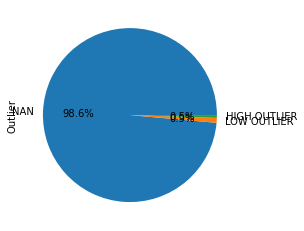

In [63]:
clean_df['Outlier'].value_counts(normalize=True).plot.pie(autopct="%1.1f%%")

#### Remarque:  
A mon avis, cette variable, si elle est mentionnée, elle indique à quel point la donnée (ligne) est un outlier (high / low). Puisque rien n'est sûr et pour éviter de supprimer des informations qui peuvent être utile, nous allons donc supprimer cette variable;

In [64]:
#supprimer la variable "outlier"
clean_df  = clean_df.drop(['Outlier'], axis=1)
clean_df.shape

(3098, 44)

## 2.4. TaxParcelIdentificationNumber <a class="anchor" id="2.4"></a>   

In [65]:
clean_df['TaxParcelIdentificationNumber']

0        659000030
1        659000220
2        659000475
3        659000640
4        659000970
           ...    
6711    1624049080
6712    3558300000
6713    1794501150
6714    7883603155
6715    7857002030
Name: TaxParcelIdentificationNumber, Length: 3098, dtype: object

#### Remarque:  
Nous remarquons que le contenu de cette variable est numérique. Nous devons donc convertir son type vers float.

In [66]:
# comparer le shape avant et après conversion
print(clean_df[clean_df.TaxParcelIdentificationNumber.str.isnumeric()].shape)
print(clean_df.shape)


(3093, 44)
(3098, 44)


#### Remarque:  
5 lignes semblent avoir un problème et ne sont pas converties en numérique. Nous allons donc les supprimer.

In [67]:
#injecter dans clean_df uniquement les lignes qui peuvent etre converties en numérique
clean_df = clean_df[clean_df.TaxParcelIdentificationNumber.str.isnumeric()]
print(clean_df.shape)

(3093, 44)


In [68]:
#convertir le type de la variable
clean_df.TaxParcelIdentificationNumber = clean_df.TaxParcelIdentificationNumber.astype(int)
clean_df.TaxParcelIdentificationNumber.dtypes

dtype('int64')

## 2.5. Neighborhood <a class="anchor" id="2.5"></a>   

Cette variable présente le quartier. 

In [69]:
neighborhood_list= clean_df['Neighborhood'].unique()
print(neighborhood_list)
print("le nombre de quartiers est ", len(neighborhood_list))

['DOWNTOWN' 'NORTHEAST' 'EAST' 'LAKE UNION' 'GREATER DUWAMISH' 'BALLARD'
 'NORTHWEST' 'MAGNOLIA / QUEEN ANNE' 'CENTRAL' 'SOUTHWEST' 'SOUTHEAST'
 'DELRIDGE' 'NORTH' 'DELRIDGE NEIGHBORHOODS']
le nombre de quartiers est  14


### Remarque:  
Nous remarquons que 'DELRIDGE' et 'DELRIDGE NEIGHBORHOODS' semblent indiquer le même quartier. Nous allons donc unifier leur noms. 

In [70]:
#unification des noms
clean_df['Neighborhood'] = clean_df['Neighborhood'].replace(['DELRIDGE NEIGHBORHOODS'],'DELRIDGE')

In [71]:
#revérifier "Neighborhood" après nettoyage
neighborhood_list= clean_df['Neighborhood'].unique()
print(neighborhood_list)
print("le nombre de quartiers est ", len(neighborhood_list))

['DOWNTOWN' 'NORTHEAST' 'EAST' 'LAKE UNION' 'GREATER DUWAMISH' 'BALLARD'
 'NORTHWEST' 'MAGNOLIA / QUEEN ANNE' 'CENTRAL' 'SOUTHWEST' 'SOUTHEAST'
 'DELRIDGE' 'NORTH']
le nombre de quartiers est  13



## 2.6. YearsENERGYSTARCertified <a class="anchor" id="2.6"></a>    


Vérifions maintenant la colonne "YearsENERGYSTARCertified" qui contient 96,59% des valeurs manquantes. Egalement, pas de documentation est fournie pour cette variable.


In [72]:
clean_df['YearsENERGYSTARCertified'].unique()

array(['NAN', '2016', '2014', '2012', '2015',
       '2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008',
       '2010, 2009, 2007', '2010, 2007', '2016, 2015', '2017, 2015',
       '2015, 2014, 2012, 2011, 2009', '2012, 2009, 2008',
       '2016, 2015, 2014, 2013, 2011, 2010, 2009, 2007, 2000',
       '2016, 2009, 2008', '2016, 2014, 2012',
       '2016, 2015, 2014, 2012, 2008',
       '2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004',
       '2014, 2013, 2011, 2010, 2009, 2008, 2007',
       '2016, 2015, 2014, 2013, 2011, 2008',
       '2016, 2015, 2014, 2013, 2008', '2016, 2015, 2013, 2012, 2010',
       '2015, 2013, 2012, 2010', '2007', '2010', '2016, 2015, 2009, 2008',
       '2013, 2009, 2008', '2017', '2017, 2011, 2010, 2007',
       '2017, 2016, 2014, 2013, 2012, 2011, 2010, 2009, 2007',
       '2015, 2014, 2012, 2010, 2008', '2012, 2010, 2009, 2008',
       '2009, 2005', '2017, 2015, 2014, 2013', '2016, 2015, 2012',
       '2012, 2010, 2007, 200

Normalement, cette variable nous indique l'année de certification EnergyStar. Les données nécessite un prétraitement puisque les années sont parfois attachée. Je pense que c'est inutile de les nettoyer puisque selon l'objectif du projet, cette information est inutile. nous allons donc la supprimer. 

In [73]:
clean_df  = clean_df.drop(['YearsENERGYSTARCertified'], axis=1)
clean_df.shape

(3093, 43)

## 2.7. DefaultData <a class="anchor" id="2.7"></a>    

In [74]:
clean_df['DefaultData'].unique()

array(['NO', 'YES', 'NAN', 'FALSE', 'TRUE'], dtype=object)

#### Remarque:  
Nous remarquons qu'il n'y a pas de documentation pour cette variable. En plus les données indiquées ne sont pas informatifs. Nous décidons donc de supprimer cette colonne. 

In [75]:
clean_df  = clean_df.drop(['DefaultData'], axis=1)
clean_df.shape

(3093, 42)

## 2.8. ComplianceStatus <a class="anchor" id="2.8"></a>  

In [76]:
clean_df['ComplianceStatus'].unique()

array(['COMPLIANT', 'NON-COMPLIANT', 'ERROR - CORRECT DEFAULT DATA',
       'MISSING DATA'], dtype=object)

In [77]:
d= clean_df[clean_df['ComplianceStatus']=='MISSING DATA']
d

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ComplianceStatus,Latitude,Longitude,Address,City,State,zip,nbre_TotalUseType
4086,19776,2016,NONRESIDENTIAL,OFFICE,WELCOME HOME SOCIETY - PRICECO,164000020,5,NORTHWEST,2002,1.0,1.0,29924,0,29924,EDUCATION,29924.0,PUBLIC_SERVICE,NAN,PUBLIC_SERVICE,NAN,NAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MISSING DATA,47.72777,-122.34503,13537 AURORA AVE N,SEATTLE,WA,98133.0,1


#### Remarque:  
il n'y a pas de documentation concernant cette colonne. j'ai essayé d'explorer les lignes qui sont mentionnées "missing data". nous remarquons que pour cette ligne les mesures d'electrecité , de gaz et energystarscore ne sont pas mentionnés. C'est inutile donc de la garder. Nous allons la supprimer. 

In [78]:
clean_df = clean_df[clean_df['ComplianceStatus']!='MISSING DATA']

In [79]:
clean_df.shape

(3092, 42)

Nous allons maintenant supprimer la variable.

In [80]:
clean_df  = clean_df.drop(['ComplianceStatus'], axis=1)
clean_df.shape

(3092, 41)

## 2.9. Address, City, State, CouncilDistrictCode  <a class="anchor" id="2.9"></a>  

In [81]:
#verifier le nombre des valeurs unique pour City
len(clean_df['City'].unique())

1

In [82]:
##verifier le nombre des valeurs unique pour State
len(clean_df['State'].unique())

1

In [83]:
##verifier le nombre des valeurs unique pour Adress
len(clean_df['Address'].unique())

2383

#### Remarque:  
Nous constatons que les variables State et City ont une seule valeur unique dans tout le df. C'est inutile donc de les garder. Nous allons donc les supprimer.

In [84]:
clean_df  = clean_df.drop(['City','State'], axis=1)
clean_df.shape

(3092, 39)

In [85]:
#modifier le type de la variable CouncilDistrictCode vers numérique
clean_df['CouncilDistrictCode'] = clean_df['CouncilDistrictCode'].astype(int)

# B. Les variables quantitatives <a class="anchor" id="B"></a>     

Les deux variables quantitatives à prédire dans notre projet:
   - Consommation d'énergie du bâtiment (SiteEnergyUse(kBtu)  
   - Emissions de CO2 (TotalGHGEmissions)    


- surface bati brute du batiment et du parking (PropertyGFATotal)
- la consommation d’énergie de la propriété divisée par sa superficie brute. (SourceEUI(kBtu/sf)
- La quantité annuelle de vapeur de district consommée (SteamUse(kBtu))
- consommation d’énergie du site d’une propriété divisée par sa superficie brute.(SiteEUI(kBtu/sf)
- Sore entre 1 à 100 qui évalue le rendement énergétique global d’une propriété (ENERGYSTARScore)

Vérifions la distribution de ces variables, ou plutôt mesures, leur normalité, et si elles contiennent des outliers ou des valeurs manquantes. 
Nous allons tout d'abord analyser et nettoyer quelques variables quantitatives (YearBuilt , Electricity / NaturalGas, SiteEUIWN(kBtu/sf) - SourceEUIWN(kBtu/sf) - SiteEnergyUseWN(kBtu)) afin de vérifier s'il y a redondance. 

## 2.10. Latitude, Longitude <a class="anchor" id="2.10"></a>  

In [86]:
#modifier le type de la variable Longitude vers numérique
clean_df['Longitude'] = pd.to_numeric(clean_df['Longitude'])

In [87]:
clean_df['Longitude'] = clean_df.Longitude.astype(float)

In [88]:
#modifier le type de la variable Latitude vers numérique
clean_df['Latitude'] = pd.to_numeric(clean_df['Latitude'])

In [89]:
clean_df['Latitude'] = clean_df.Latitude.astype(float)

Une fois que nous avons converti Latitude et Longitude vers numérique, nous proposons de les transformer en une seule variable "haversine_distance". Nous allons calculer , pour chaque batiment, sa distance par rapport au city hall dont les coordonnées sont: 47.605061(latitude) -122.329820(longitude).

In [90]:
import numpy as np
from haversine import haversine, Unit
#definir la fonction haversine
def haversine_distance(latx,longx,laty, longy):
    return haversine((latx,longx), (laty,longy), Unit.KILOMETERS)

#appliquer la fonction 
clean_df.loc[:,'dist_cityHall'] = np.vectorize(haversine_distance) (clean_df['Latitude'],clean_df['Longitude'],47.605061, -122.329820)



In [91]:
#supprimer les deux colonne Latitude et Longitude
clean_df  = clean_df.drop(['Latitude','Longitude'], axis=1)
clean_df.shape

(3092, 38)

## 2.10. YearBuilt 	 <a class="anchor" id="2.10"></a>    
Nous allons voir les distributions des années de construction des bâtiments.

In [92]:
clean_df['YearBuilt']

0       1927
1       1996
2       1969
3       1926
4       1980
        ... 
6711    1990
6712    2004
6713    1974
6714    1989
6715    1938
Name: YearBuilt, Length: 3092, dtype: object

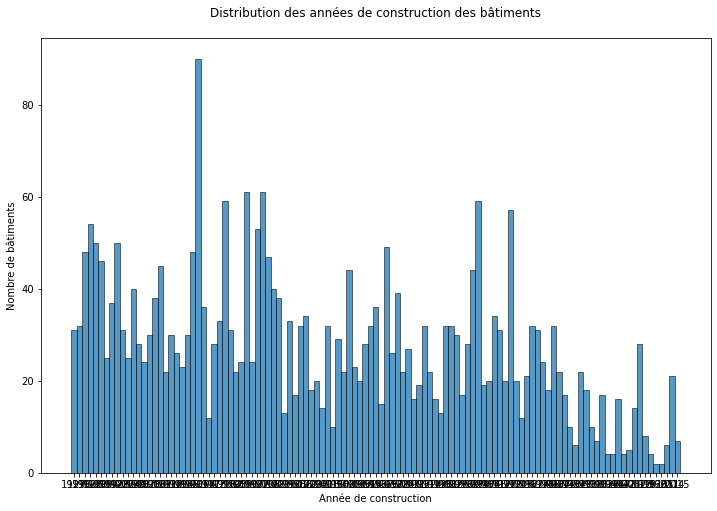

In [93]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=clean_df, x='YearBuilt', bins=50)
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution des années de construction des bâtiments\n")
plt.show()


### Remarque:  
Nous remarquon que la majorité des batiments sont construites en 1960.  
Je pense que cette information peut être très utile pour prédire le taux de consommation de l'énergie, parce que l'âge du batiment est très important. C'est pourquoi, je vais créer une nouvelle variable, plus utile que l'année de construction, et c'est l'âge du batiment. Ensuite je vais supprimer la colonne "YearBuilt".

In [94]:
#création d'une nouvelle variable "Building_age"
clean_df['Building_age'] = clean_df['DataYear'].astype(int) - clean_df['YearBuilt'].astype(int)

In [95]:
#suppression de la colonne 'YearBuilt'
clean_df = clean_df.drop(['YearBuilt'], axis=1)
clean_df.shape

(3092, 38)

## 2.11. Electricity / NaturalGas	 <a class="anchor" id="2.11"></a>   
- Electricity: C'est la quantité annuelle d’électricité consommée par le batiment.  
- NaturalGas: Quantité annuelle de gaz naturel fourni par les services publics consommée par la propriété.
  
  
- Nous remarquons que ces deux variables semblent redondantes: Electricity(kWh) et Electricity(kBtu)/ NaturalGas(therms) et NaturalGas(kBtu).
Pour mieux comprendre les mesures utilisées, j'ai fait cette petite recherche:  
les acronymes utilisés dans les colonnes:

    GHG: greenhouse gas emissions, correspond aux émissions des gazs à effets de serre.
    OSE: Seattle Office of Sustainability and Environment.
    EUI: Energy Use Intensity.
    kBtu: kilo-British thermal unit, 1 kWh = 3.412 kBtu.
    sf: square feet, 1m² = 10,7639sf.
    WN: weather-normalized, normalisé vis à vis des conditions climatiques.
    GFA: Gross floor area, Surface de plancher brute - La surface de plancher couverte (par un toit, même sans mur) totale contenue dans le bâtiment.
    therm: mesure énergétique 1thm =100000Btu.  
 
 Pour vérifier si chaque couple de variables présentent le même feature, nous proposons de vérifier si elles ont une relations linéaires.   
    

In [96]:
clean_df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'Address', 'zip',
       'nbre_TotalUseType', 'dist_cityHall', 'Building_age'],
      dtype='object')

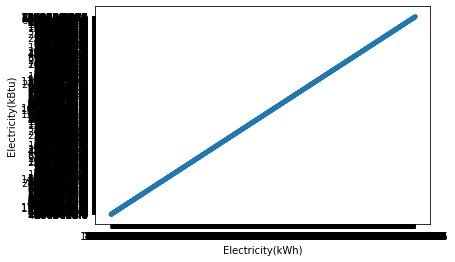

In [97]:
#vérifier la linéarité entre Electricity(kWh) et Electricity(kBtu)
plt.plot(clean_df['Electricity(kWh)'],clean_df['Electricity(kBtu)'],'.')
plt.xlabel('Electricity(kWh)')
plt.ylabel('Electricity(kBtu)')
plt.show()

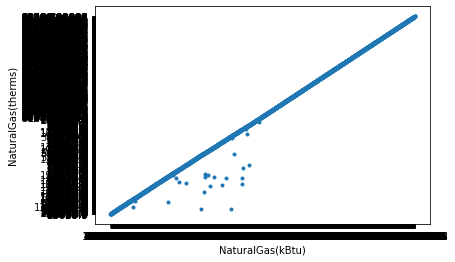

In [98]:
#vérifier la linéarité entre NaturalGas(therms) et NaturalGas(kBtu)
plt.plot(clean_df['NaturalGas(kBtu)'],clean_df['NaturalGas(therms)'],'.')
plt.xlabel('NaturalGas(kBtu)')
plt.ylabel('NaturalGas(therms)')
plt.show()

### Remarques:  
C'est bien le cas, chaque deux variables vérifient une relation de linéarité entre eux. On remarque que pour le couple NaturalGas(kBtu)/NaturalGas(therms), il y a quelques points qui sont hors de la lignes de linéarité. Nous supposons que ce sont des outliers.  
Nous décidons donc de garder que les variables mesurées en KBtu pour rester en homogénité avec les autres mesures de notre dataset. Supprimons donc les variables mesurées par d'autres unités.

In [99]:
redundant_vars = ['NaturalGas(therms)','Electricity(kWh)']
clean_df.drop(redundant_vars, axis=1, inplace=True)

In [100]:
clean_df.shape

(3092, 36)

### Remarque  
Après avoir supprimer les colonnes redondantes, nous sommes passés de 39 variables vers 37 variables.

## 2.12. SiteEUIWN(kBtu/sf) - SourceEUIWN(kBtu/sf) - SiteEnergyUseWN(kBtu) <a class="anchor" id="2.12"></a>   
 Les suffixes WN : "Weather Normalized": ce sont les mesures normalisées avec les conditions climatiques. Dans le cadre de notre analyse, la météo ne sera pas pris en compte puisque l'émission de gaz à effet de serre est liée de façon directe à la consommation d'énergie. Nous allons donc supprimer les variables contenant ce préfixe. Pour automatiser cette opération, nous allons définir une méthode qui le fait et qui prend en paramètre le df et le suffixe à supprimer (une telle fonction pourra nous être utile dans les prochains projets.

In [101]:
#fonction qui cherche les variables contenant le suffixe en question
def search_var(df, suffix):
  vars_to_drop = []
  for col in df.columns:
      if suffix in col: 
        vars_to_drop.append(col)
  return vars_to_drop

In [102]:
#supprimer les variables contenant le suffixe ""WN
clean_df.drop(search_var(clean_df,'WN'), axis=1, inplace=True)

In [103]:
clean_df.shape

(3092, 33)

### Remarque  
Après avoir supprimer les colonnes contenant le suffixe "WN", nous sommes passés de 37 variables vers 34 variables.

## 2.13. Distribution des variables quantitives <a class="anchor" id="2.13"></a>   

In [104]:
quantitative_vars = ['PropertyGFATotal', 'SourceEUI(kBtu/sf)', \
                       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',\
                       'Electricity(kBtu)', 'SiteEUI(kBtu/sf)', \
                       'TotalGHGEmissions', 'GHGEmissionsIntensity', \
                       'NaturalGas(kBtu)', 'ENERGYSTARScore']

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


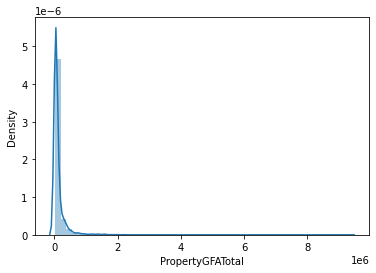

<Figure size 864x432 with 0 Axes>

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


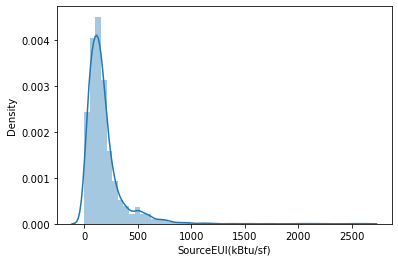

<Figure size 864x432 with 0 Axes>

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


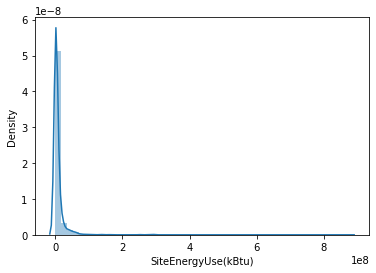

<Figure size 864x432 with 0 Axes>

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


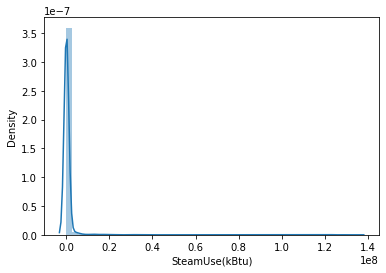

<Figure size 864x432 with 0 Axes>

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


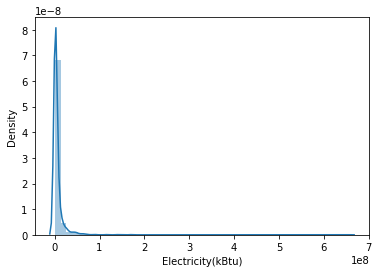

<Figure size 864x432 with 0 Axes>

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


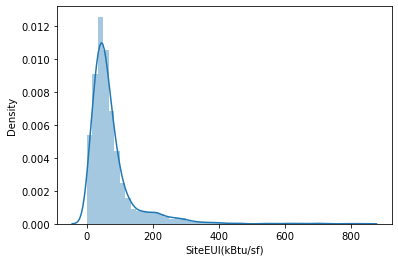

<Figure size 864x432 with 0 Axes>

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


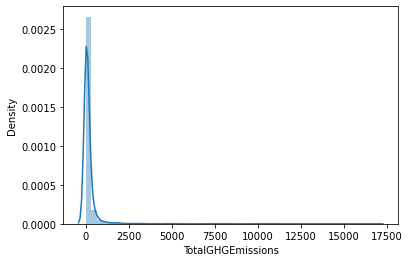

<Figure size 864x432 with 0 Axes>

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


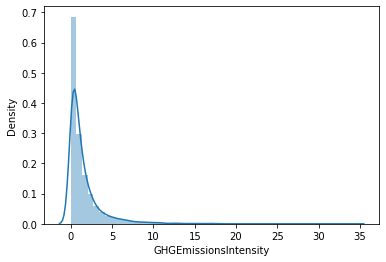

<Figure size 864x432 with 0 Axes>

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


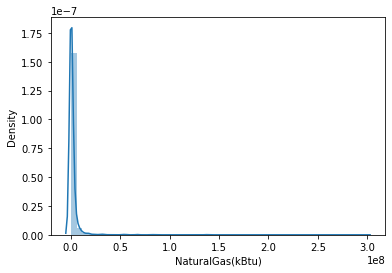

<Figure size 864x432 with 0 Axes>

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


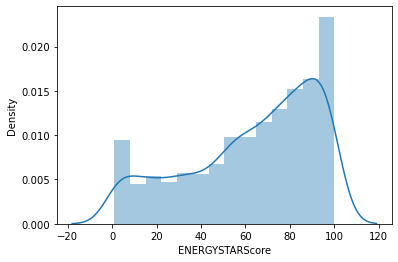

<Figure size 864x432 with 0 Axes>

In [105]:
#afficher la distributions des variables quantitatives
for var in quantitative_vars:
    sns.distplot(clean_df[var], label=var)
    plt.figure(figsize=(12,6))
    plt.show()

In [106]:
#faut tout d'abord s'assurer que toute les valeur sont numériques
for var in quantitative_vars:
    clean_df[var]= pd.to_numeric(clean_df[var],errors='coerce')

PropertyGFATotal


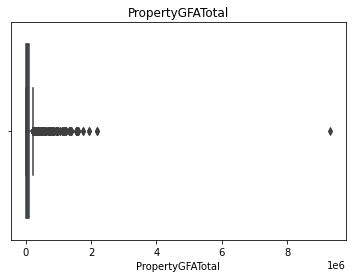

SourceEUI(kBtu/sf)


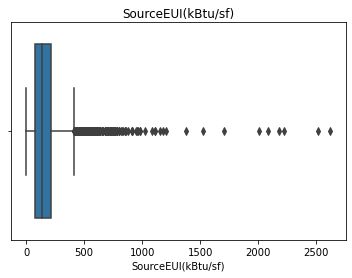

SiteEnergyUse(kBtu)


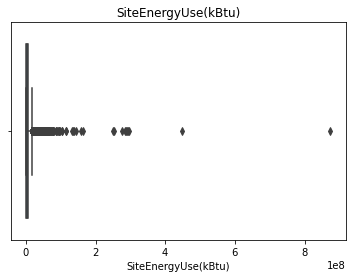

SteamUse(kBtu)


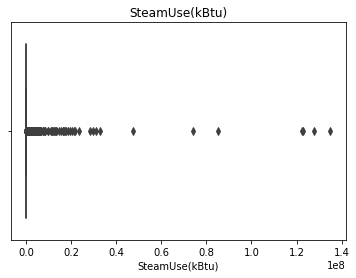

Electricity(kBtu)


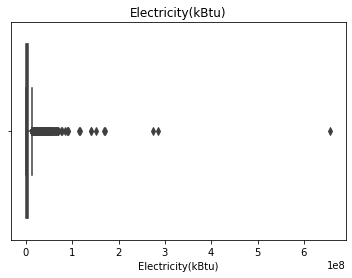

SiteEUI(kBtu/sf)


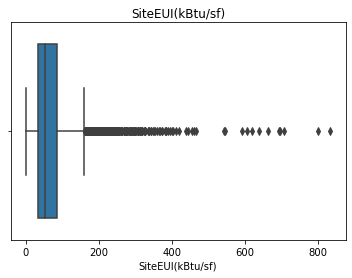

TotalGHGEmissions


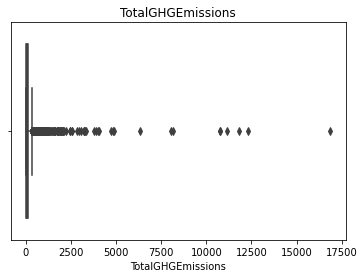

GHGEmissionsIntensity


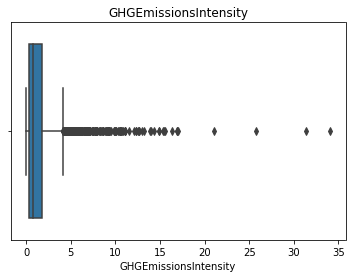

NaturalGas(kBtu)


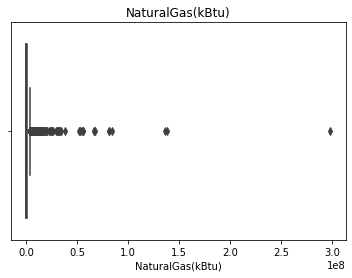

ENERGYSTARScore


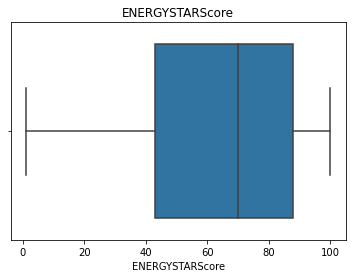

In [107]:
for var in quantitative_vars:
    print(var)
    sns.boxplot(x= var , data= clean_df)
    plt.title(var)
    plt.show()

### Remarques:  
- Nous remarquons que toutes les variables, à l'exception de ENERGYSTARScore, suivent une distribution normale.  
- Nous remarquons aussi que les valeurs sont retrécis dans un petit intervalle. Je pense que la longue ligne après la pique ne présente pas des outliers mais plut tôt c'est à cause des marges de valeurs assez élevée. Je trouve que cette marge est tout à fait normale. Par exemple, le faite que la consommation d'énergie (sourceEUI) atteint 2500 KBtu/sf est tout à fait normal si la propriété est un hopital. Nous allons uniformiser l'échelle plus tard. 
- Pour le moment, nous allons supprimer les valeurs négatives dont nous considérons comme outliers. 

In [108]:
for var in quantitative_vars:
    print('\ndans ',var, 'les statistiques sont\n', clean_df[var].describe())


dans  PropertyGFATotal les statistiques sont
 count    3.092000e+03
mean     1.170617e+05
std      2.582013e+05
min      1.128500e+04
25%      2.880000e+04
50%      4.789950e+04
75%      1.043520e+05
max      9.320156e+06
Name: PropertyGFATotal, dtype: float64

dans  SourceEUI(kBtu/sf) les statistiques sont
 count    3089.000000
mean      181.983684
std       184.959693
min        -2.000000
25%        79.300003
50%       138.200000
75%       212.400000
max      2620.000000
Name: SourceEUI(kBtu/sf), dtype: float64

dans  SiteEnergyUse(kBtu) les statistiques sont
 count    3.089000e+03
mean     8.392254e+06
std      2.608672e+07
min      0.000000e+00
25%      1.189402e+06
50%      2.616127e+06
75%      7.221482e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64

dans  SteamUse(kBtu) les statistiques sont
 count    3.089000e+03
mean     5.285438e+05
std      5.407941e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.34

#### Remarques:   

Nous remarquons qu'il y a des outliers. Cette observation est encore prouvée par la fonction describe().  
Les variables 'SourceEUI(kBtu/sf)','GHGEmissionsIntensity', 'TotalGHGEmissions'et Electricity(kBtu) contiennent des valeurs négatives. Nous allons les supprimer. Ensuite nous allons normaliser les variables qui ont des extrémité exponentiennes (NaturalGas(kBtu), Electricity(kBtu), SteamUse(kBtu), SiteEnergyUse(kBtu), PropertyGFATotal)

In [109]:
# supprimer les lignes qui contiennent des valeurs inférieurs ou égale à zéro
to_clean_negative_values= ['TotalGHGEmissions','GHGEmissionsIntensity','SourceEUI(kBtu/sf)','Electricity(kBtu)' ]
for var in to_clean_negative_values:
    cleaned_rows = clean_df[clean_df[var] < 0]
    if (cleaned_rows.shape[0]>0) :
        print(var)
        display(cleaned_rows)
        clean_df.drop(cleaned_rows.index, inplace=True)

TotalGHGEmissions


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Address,zip,nbre_TotalUseType,dist_cityHall,Building_age
6546,49784,2016,NONRESIDENTIAL,OFFICE,BULLITT CENTER,7234600195,3,CENTRAL,1.0,6.0,52000,0,52000,OFFICE,48159.0,PUBLIC_SERVICE,NAN,PUBLIC_SERVICE,NAN,100.0,7.1,2.0,342726.0938,0.0,-115417.0,0.0,-0.8,-0.02,1501 E. MADISON ST.,98122.0,1,1.652943,3


SourceEUI(kBtu/sf)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Address,zip,nbre_TotalUseType,dist_cityHall,Building_age
3246,49784,2015,NONRESIDENTIAL,OFFICE,BULLITT CENTER,7234600195,3,CENTRAL,1.0,6.0,41929,0,41929,OFFICE,48159.0,PUBLIC_SERVICE,NAN,PUBLIC_SERVICE,NAN,100.0,11.7,-2.0,562479.0,0.0,562503.0,0.0,3.92,0.04,1501 E MADISON ST,98122.0,1,1.661207,2


In [110]:
clean_df.shape

(3090, 33)

#### Remarque:  
Nous avons supprimé 2 lignes contenant des valeurs négatives. Le nombre de lignes est passé de 3092 --> 3090

## 2.14 Vérification des lignes vides  <a class="anchor" id="2.14"></a>    
Dans cette partie, je vais vérifier s'il existe des lignes contenant beaucoup de données manquantes. Si oui, je vais les supprimer. 

In [111]:
#définir une fonction qui affiche un histogramme des pourcentage de nans pour les lignes de dataframe
def nans_rows_hist (dataframe):
    df=pd.DataFrame(columns = ['row_index', 'percentage_of_NaNs'])
    for i,row in dataframe.iterrows():
        percentage_nans = round((dataframe.loc[[i]].isna().sum().sum()/dataframe.shape[1])*100,2)
        new_row={'row_index':i,
                 'percentage_of_NaNs':percentage_nans}
        df=df.append(new_row, ignore_index=True)
    df.sort_values(by='percentage_of_NaNs',inplace=True)
    #f.plot(kind='bar',x='row_index', stacked=False,rot=45,figsize=(20,6))
    df['percentage_of_NaNs'].hist(bins=20)
    plt.show()
  

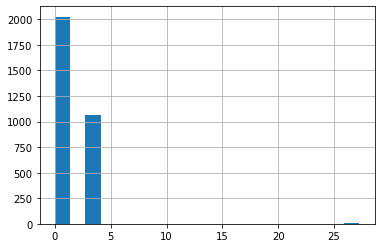

In [112]:
nans_rows_hist(clean_df)

### Remarque:  
Nous remarquons que que la majorité des lignes ayant des valeurs manquantes ont à peu près 4% des Nans. Nous remarquons aussi que le pourcentage maximal des valeurs manquantes est à peut près de 26%. En plus , ce pourcentage est de très faible fréquence. Nous décidons donc de garder ces lignes et ne pas les filtrer selon leur pourcentage de valeurs manquantes.

## 3. Analyse statistique <a class="anchor" id="3."></a>   

## 3.1. Analyse univariée <a class="anchor" id="3.1"></a>   
Dans cette partie, nous allons faire l'analyse univariée des variables qualitatives et des variables quantitatives.

## A. Les variables qualitatives <a class="anchor" id="3.A"></a>  

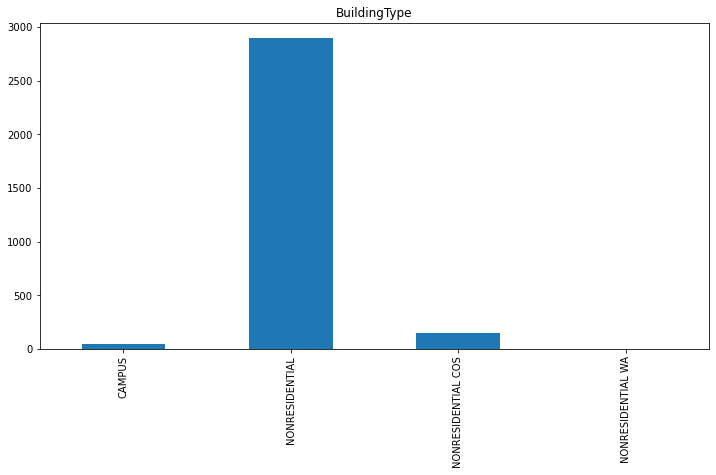

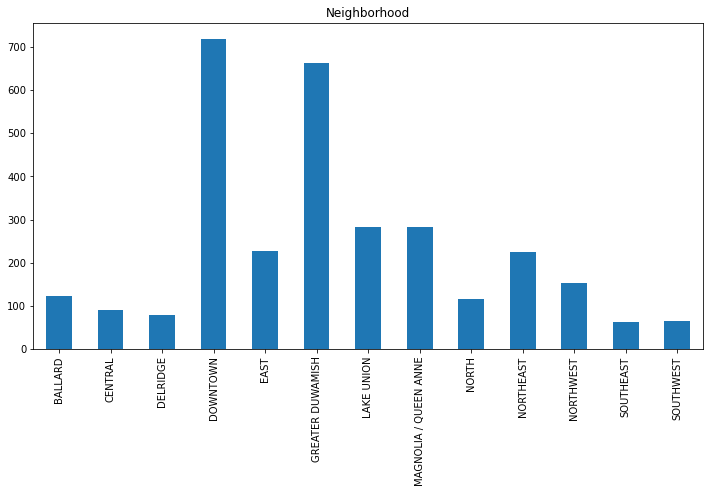

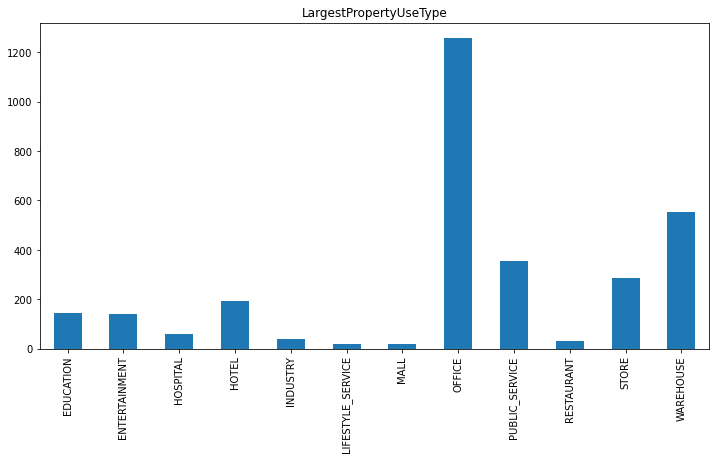

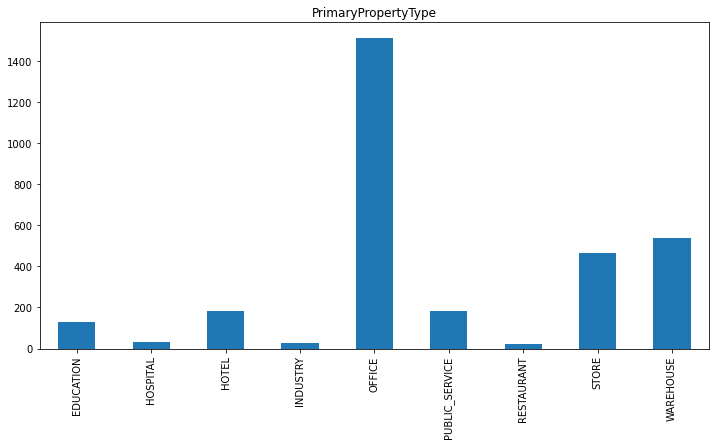

In [113]:
#analyse des variables qualitatives
qualitative_vars = ['BuildingType', 'Neighborhood','LargestPropertyUseType', 'PrimaryPropertyType']

for column in qualitative_vars:
    fig = plt.figure(figsize=(12,6))
    clean_df[column].value_counts().sort_index(axis=0).plot(kind='bar')
    plt.title(column)
    plt.show()

### Remarques:  
1. Nous remarquons que les types de batiments les plus fréquents sont des batiments non résidentiel de type bureaux (office).   

2. Il y a des quartiers qui sont très peu renseignés (telque Deliridge). Ceci peut être un quartier résidentiel qu'on a filtré lors de nettoyage de données.

## B. Les variables quantitatives <a class="anchor" id="3.B"></a>    

Tout d'abord nous allons modifier l'échelle des variables où nous avons remarqué le déphasage des valeurs.

In [114]:
clean_df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'Address', 'zip', 'nbre_TotalUseType', 'dist_cityHall', 'Building_age'],
      dtype='object')

In [115]:
from numpy import errstate,isneginf,array
vars_to_rescale = ['PropertyGFATotal', 'SourceEUI(kBtu/sf)', \
                       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',\
                       'Electricity(kBtu)', 'SiteEUI(kBtu/sf)', \
                       'TotalGHGEmissions', 'GHGEmissionsIntensity', \
                       'NaturalGas(kBtu)']
import numpy as np
for var in vars_to_rescale:
    with errstate(divide='ignore'):
        clean_df[var]= np.log10(clean_df[var])
    clean_df[var][np.isneginf(clean_df[var])]=0

<ipython-input-115-a48479bdee68>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[var][np.isneginf(clean_df[var])]=0


In [116]:
for var in vars_to_rescale:
    print('\ndans ',var, 'les statistiques sont\n', clean_df[var].describe())


dans  PropertyGFATotal les statistiques sont
 count    3090.000000
mean        4.792352
std         0.418430
min         4.052502
25%         4.459392
50%         4.680331
75%         5.018501
max         6.969423
Name: PropertyGFATotal, dtype: float64

dans  SourceEUI(kBtu/sf) les statistiques sont
 count    3087.000000
mean        2.106611
std         0.385063
min        -0.096910
25%         1.899547
50%         2.141136
75%         2.327767
max         3.418301
Name: SourceEUI(kBtu/sf), dtype: float64

dans  SiteEnergyUse(kBtu) les statistiques sont
 count    3087.000000
mean        6.469554
std         0.619628
min         0.000000
25%         6.075772
50%         6.417675
75%         6.858768
max         8.941474
Name: SiteEnergyUse(kBtu), dtype: float64

dans  SteamUse(kBtu) les statistiques sont
 count    3087.000000
mean        0.466728
std         1.662330
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.130152
Name: SteamUse(

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


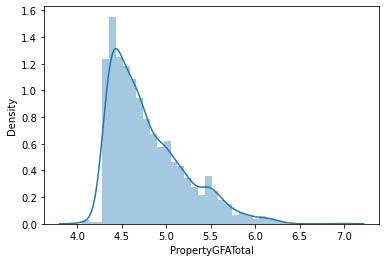

<Figure size 864x432 with 0 Axes>

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


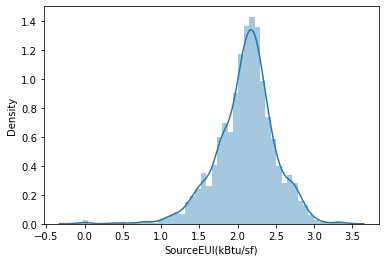

<Figure size 864x432 with 0 Axes>

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


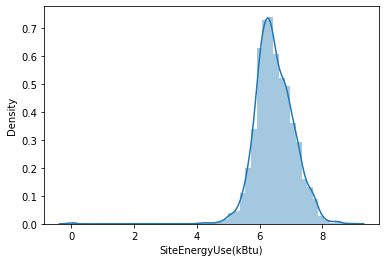

<Figure size 864x432 with 0 Axes>

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


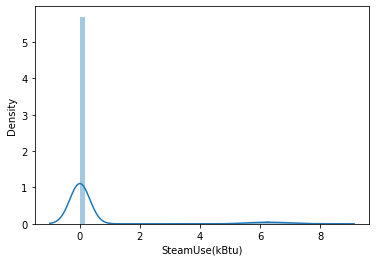

<Figure size 864x432 with 0 Axes>

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


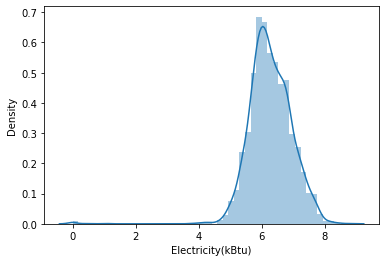

<Figure size 864x432 with 0 Axes>

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


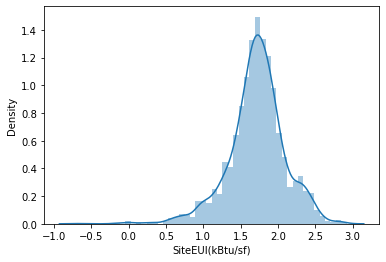

<Figure size 864x432 with 0 Axes>

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


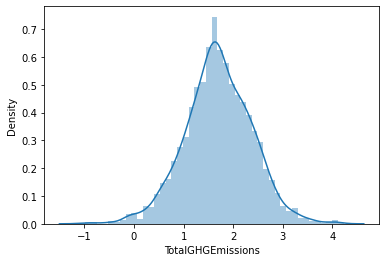

<Figure size 864x432 with 0 Axes>

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


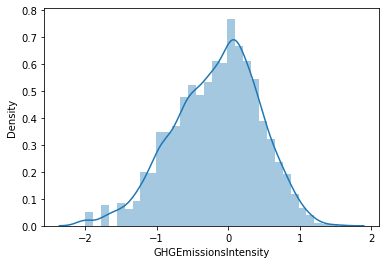

<Figure size 864x432 with 0 Axes>

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


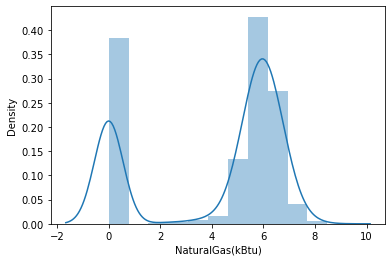

<Figure size 864x432 with 0 Axes>

In [117]:
#afficher la distributions des variables quantitatives
for var in vars_to_rescale:
    sns.distplot(clean_df[var], label=var)
    plt.figure(figsize=(12,6))
    plt.show()

#### Remarque:  
Nous remarquons, après avoir transformer les échelles des variables quantitatives, que les distributions sont plus étendues sur tout l'intervalle. Elles suivent tous des distributions normales sauf la variable "NaturalGas(kBtu). 

PropertyGFATotal


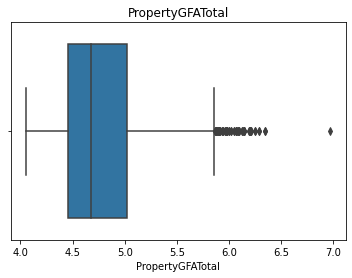

SourceEUI(kBtu/sf)


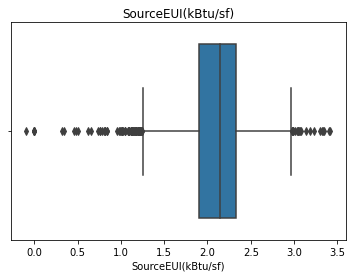

SiteEnergyUse(kBtu)


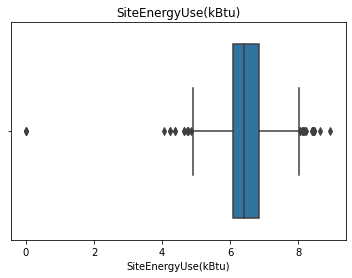

SteamUse(kBtu)


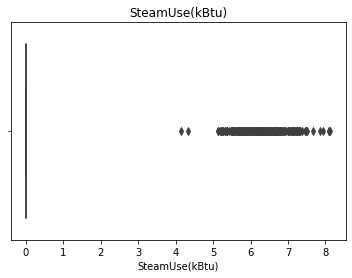

Electricity(kBtu)


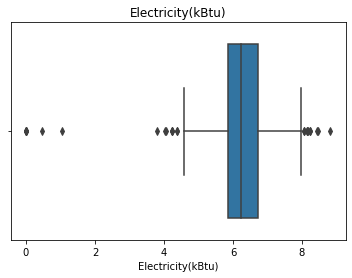

SiteEUI(kBtu/sf)


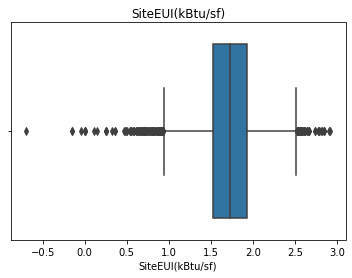

TotalGHGEmissions


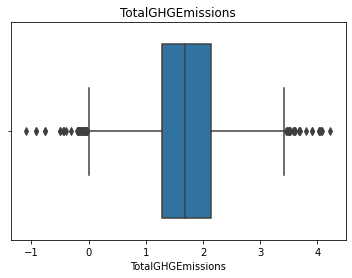

GHGEmissionsIntensity


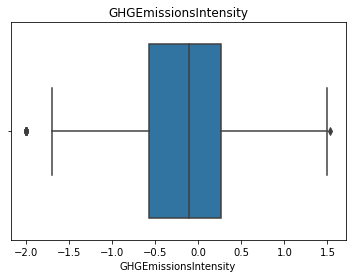

NaturalGas(kBtu)


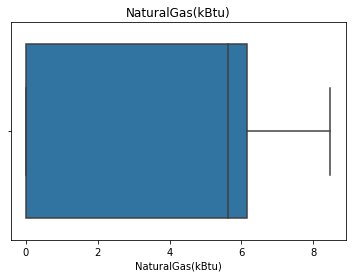

In [118]:
#vérifions leurs boxplots
for var in vars_to_rescale:
    print(var)
    sns.boxplot(x= var , data= clean_df)
    plt.title(var)
    plt.show()

### Remarque:  
Nous remarquons que le comportement de la variable "SteamUse(KBtu)" montre que la qualité de ses données n'est pas bonne, même après la conversion de son échelle (voir boxplot et distribution). Nous décidons donc de ne pas l'utiliser dans le modèle de prédiction. Nous allons la supprimer. 

In [119]:
clean_df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'Address', 'zip', 'nbre_TotalUseType', 'dist_cityHall', 'Building_age'],
      dtype='object')

In [120]:
#supprimer SteamUse(KBtu)
clean_df  = clean_df.drop(['SteamUse(kBtu)'], axis=1)
clean_df.shape

(3090, 32)

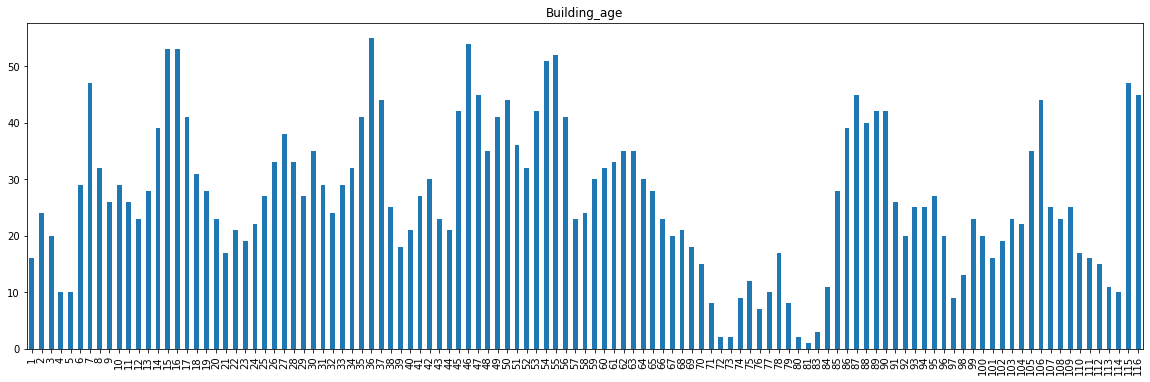

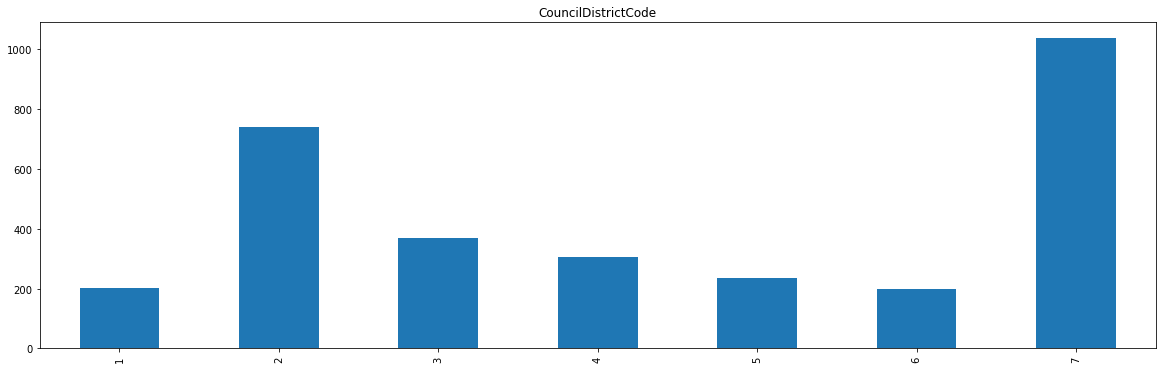

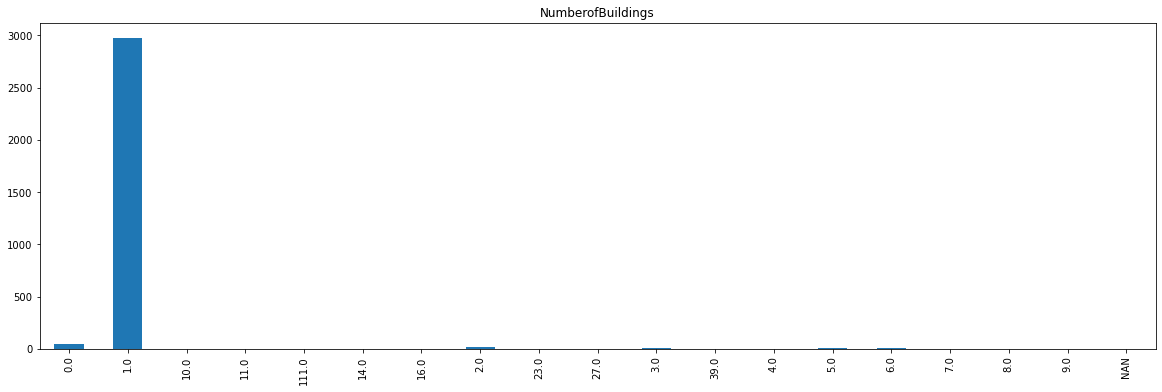

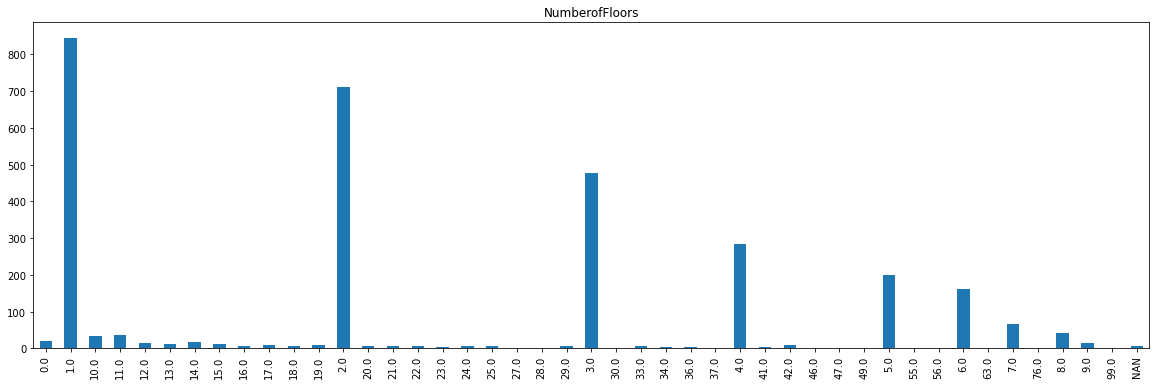

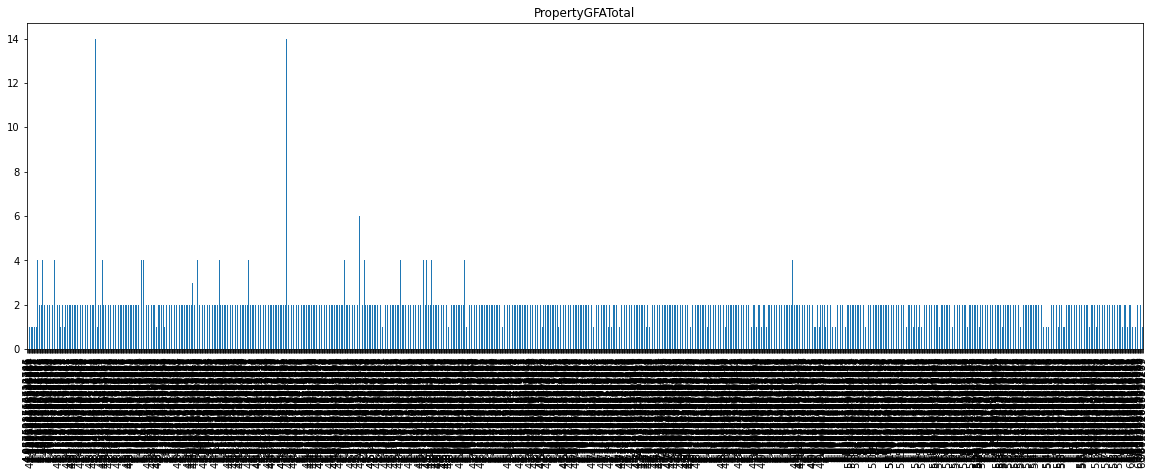

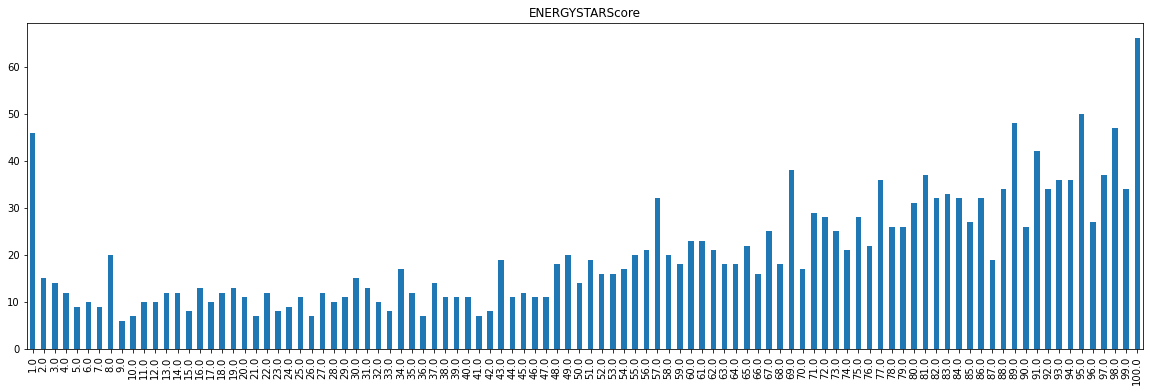

In [121]:
#etudier les autres variables quantitatives
other_quantitative_vars = ['Building_age', 'CouncilDistrictCode','NumberofBuildings', 'NumberofFloors','PropertyGFATotal','ENERGYSTARScore']

for column in other_quantitative_vars:
    fig = plt.figure(figsize=(20,6))
    clean_df[column].value_counts().sort_index(axis=0).plot(kind='bar')
    plt.title(column)
    plt.show()

#### Remarques:  
1. La majorité des batiments sont des batiments à un seul étage. 
2. La construction des batiments a diminué dans les 5 dernières année (notre repère ici est l'années où le dataset est établi). Ceci peut être expliqué par le manque de terrain libre pour batir.  
3. Le DistrictCode le plus fréquent dans le dataset est numéro 7. Pour les autres, il y a une certaine homogénité dans la dispertion des batiments. 
4. Nous remarquons que l'EnergyStarscore le plus fréquent dans notre dataset est égale à 100. Ce qui signifie que un important pourcentage de batiments (presque 67%) optimise l'utilisation de l'énergie. 

## 3.2. Analyse multivariée <a class="anchor" id="3.2"></a>   

Dans cette partie, nous allons analyser les corrélations et les dépendances linéaires entre les différentes variables quantitatives. 
Nous mettons comme hypothèse que les mesures d'energie (électricité, gaz naturel, etc) sont fortement corrélées aux variables à prédire (Consommation d'énergie du bâtiment (SiteEnergyUse(kBtu) et Emissions de CO2 (TotalGHGEmissions))


## a. Corrélation <a class="anchor" id="3.a"></a>   

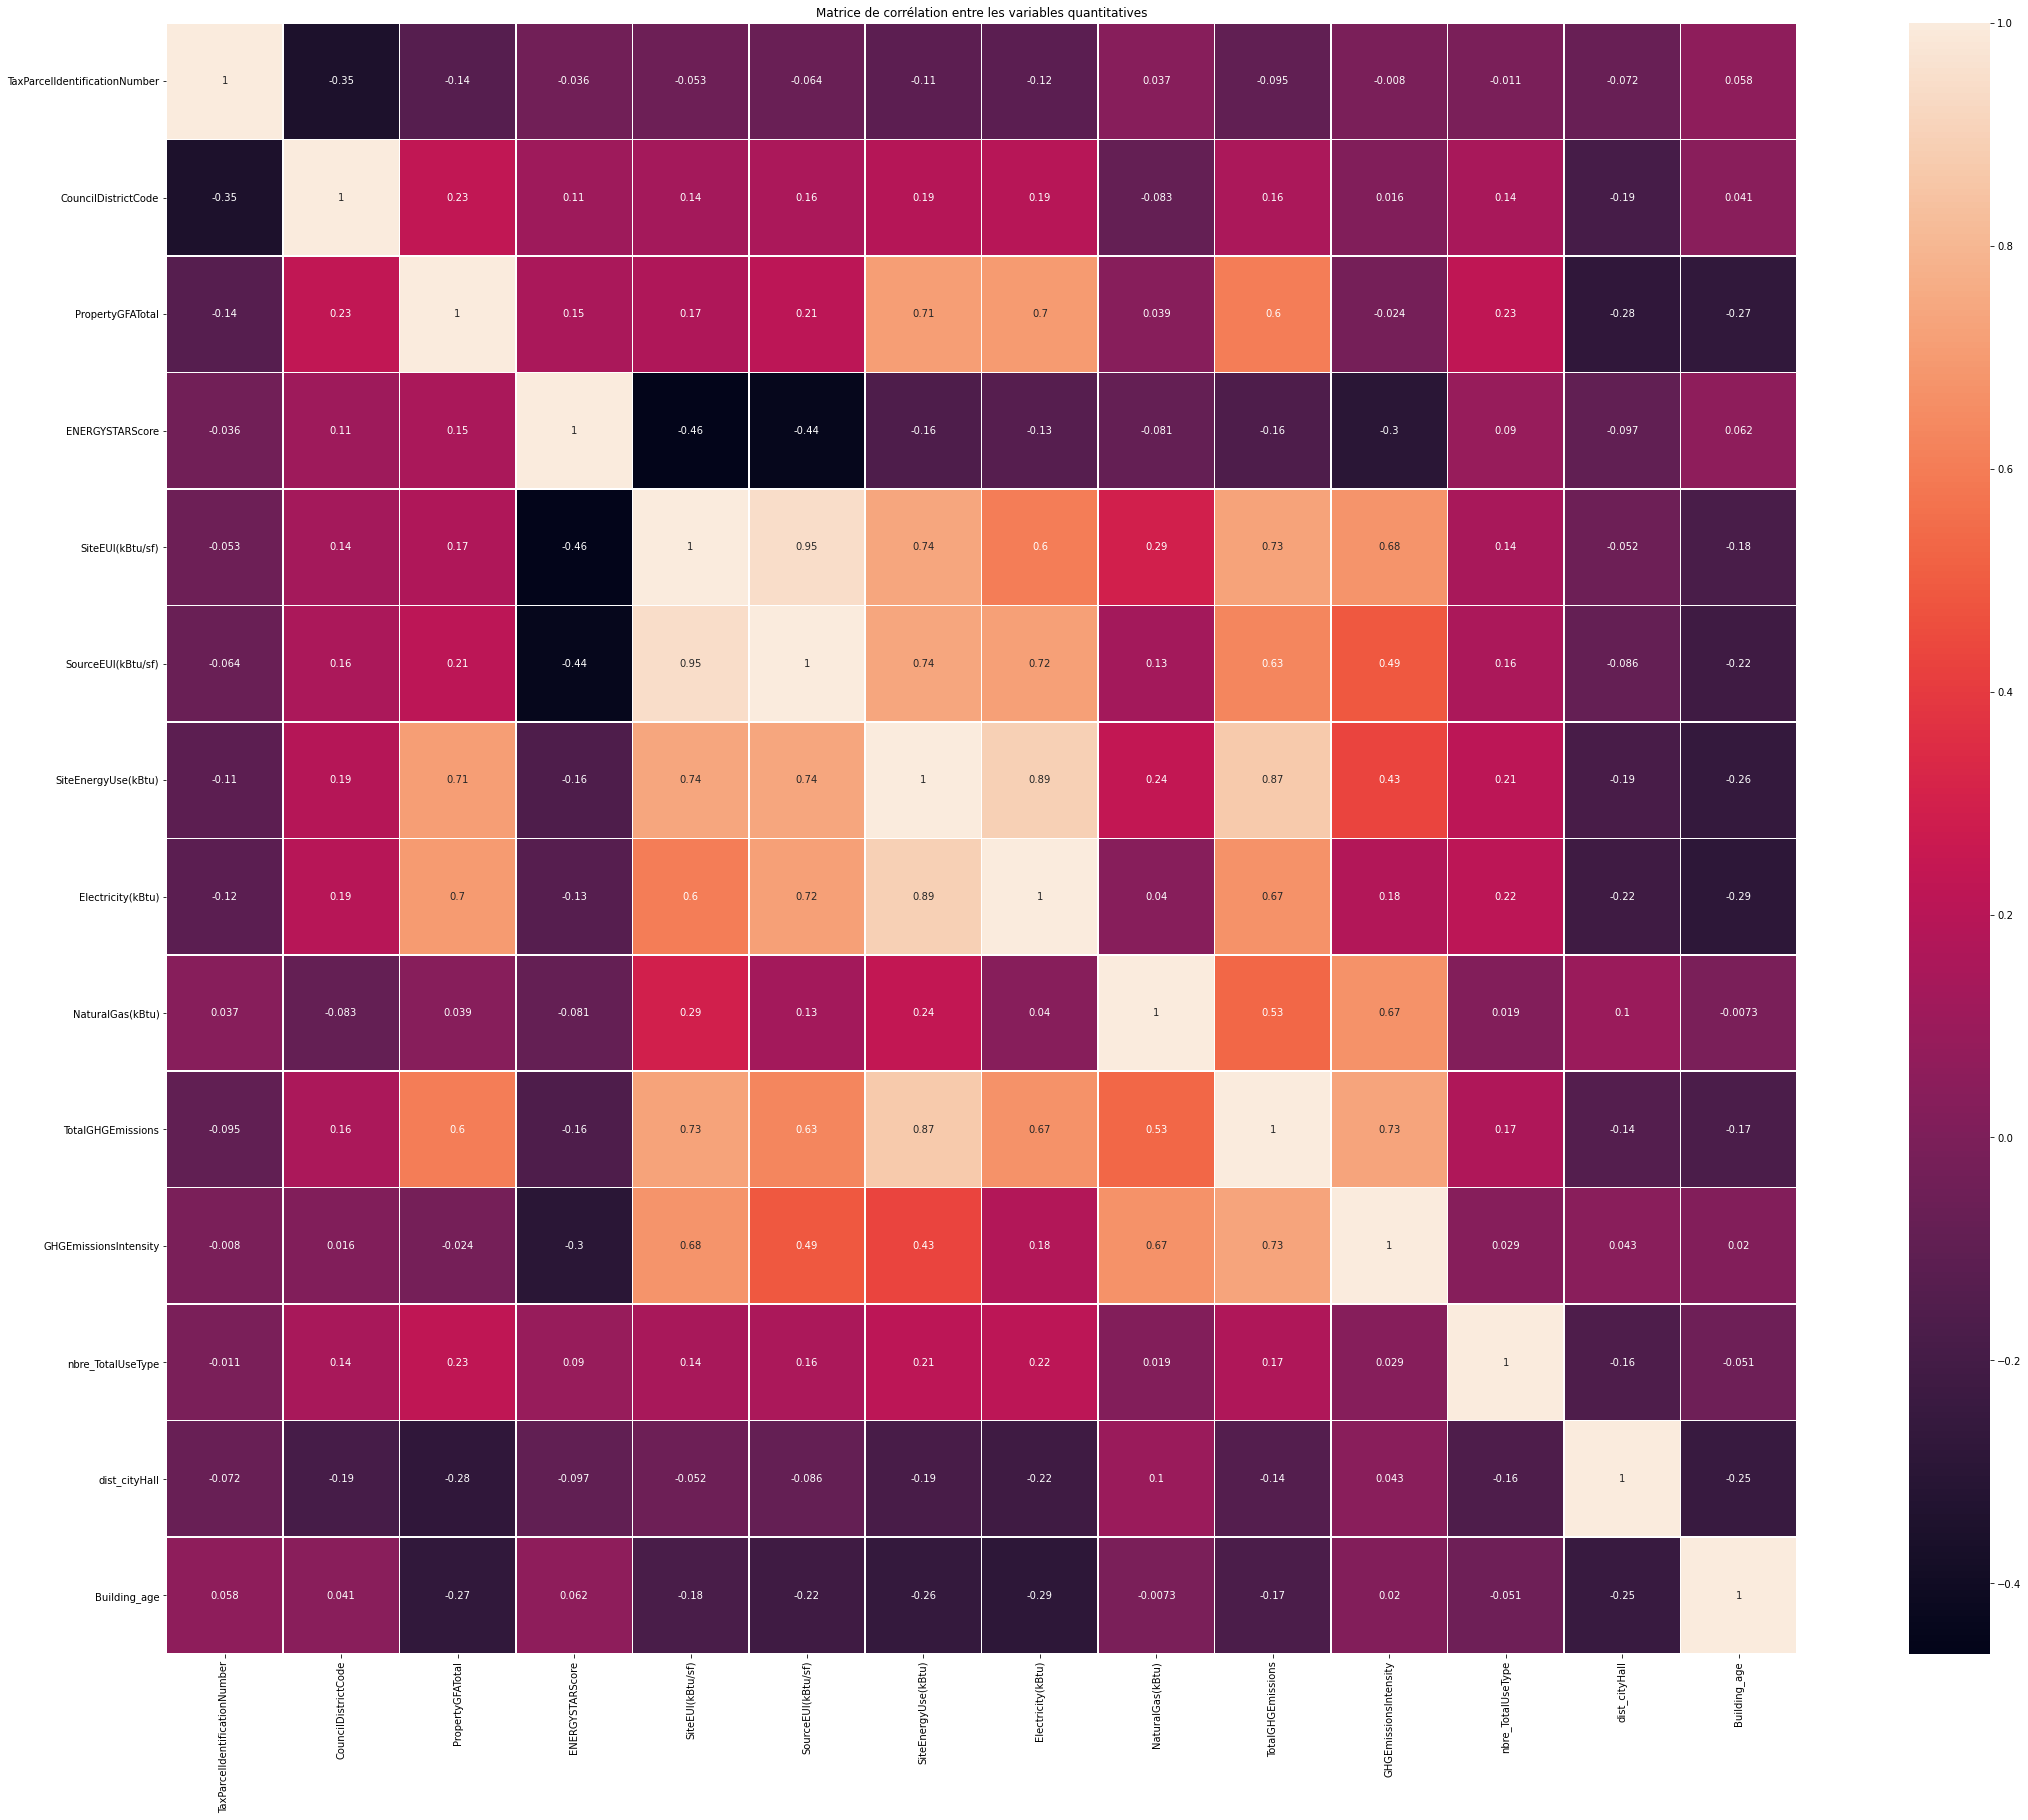

In [122]:
# corrélation entre toutes les variables quantitatives
corr_df = clean_df.corr()
plt.figure(figsize=(40, 30))
sns.heatmap(corr_df, annot=True,square=True,linewidths=.5)
plt.title("Matrice de corrélation entre les variables quantitatives")
plt.show()

In [123]:
#selectionner les feautures/variables corrélées
corr = clean_df.corr()
corr_features = corr.columns[((corr < 1) & (corr > 0.72)).any(axis=0)]
corr_features

Index(['SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'Electricity(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

Les valeurs trouvées confirment notre hypothèse. Donc pour éviter le problème de surapprentissage, nous allons éliminer les variables fortement corrélées aux varaibles target qui font partie des mesures effectuées chaque année). On va juste garder les variables qui sont liées aux batiments en eux-meme. Cette étape sera faite dans la section 3.C.Data leakage. 
Pour rappel, nos variables target sont: 'TotalGHGEmissions' (émission CO2) et SiteEnergyUse(kBtu) (consommation d'énergie). 

## b. Codage <a class="anchor" id="3.b"></a>   

Nous allons maintenant préparer les données qualitatives en les codant. Pour ce faire, nous allons utiliser deux méthodes:   
- Un dictionnaire pour coder les valeurs de même manière dans des colonnes différentes (property type)  
- OrdinalEncoder de sklearn pour coder les variables indépendantes (BuildingType / Neighborhood)

In [124]:
clean_df['SecondLargestPropertyUseType'].unique()

array(['PUBLIC_SERVICE', 'OFFICE', 'RESTAURANT', 'EDUCATION', 'WAREHOUSE',
       'STORE', 'ENTERTAINMENT', 'HOTEL', 'HOSPITAL', 'LIFESTYLE_SERVICE',
       'INDUSTRY', 'MALL'], dtype=object)

In [125]:
#coder les variables qualitatives à intégrer dans le modèle de prédiction:
vars_to_encode= ['SecondLargestPropertyUseType', 'LargestPropertyUseType', 'PrimaryPropertyType','ThirdLargestPropertyUseType']

#preparer le ditionnaire de codage
cleanup_property_types = {'SecondLargestPropertyUseType': {'PUBLIC_SERVICE': 1, 'OFFICE': 2, 'RESTAURANT':3,'EDUCATION':4, 'WAREHOUSE':5, 'STORE':6,'ENTERTAINMENT':7,'HOTEL':8,'HOSPITAL':9,'LIFESTYLE_SERVICE':10, 'INDUSTRY':11, 'MALL':12 },
                          'LargestPropertyUseType':       {'PUBLIC_SERVICE': 1, 'OFFICE': 2, 'RESTAURANT':3,'EDUCATION':4, 'WAREHOUSE':5, 'STORE':6,'ENTERTAINMENT':7,'HOTEL':8,'HOSPITAL':9,'LIFESTYLE_SERVICE':10, 'INDUSTRY':11, 'MALL':12 },
                          'PrimaryPropertyType':          {'PUBLIC_SERVICE': 1, 'OFFICE': 2, 'RESTAURANT':3,'EDUCATION':4, 'WAREHOUSE':5, 'STORE':6,'ENTERTAINMENT':7,'HOTEL':8,'HOSPITAL':9,'LIFESTYLE_SERVICE':10, 'INDUSTRY':11, 'MALL':12 },
                          'ThirdLargestPropertyUseType':  {'PUBLIC_SERVICE': 1, 'OFFICE': 2, 'RESTAURANT':3,'EDUCATION':4, 'WAREHOUSE':5, 'STORE':6,'ENTERTAINMENT':7,'HOTEL':8,'HOSPITAL':9,'LIFESTYLE_SERVICE':10, 'INDUSTRY':11, 'MALL':12 }}

In [126]:
clean_df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Address,zip,nbre_TotalUseType,dist_cityHall,Building_age
0,1,2015,NONRESIDENTIAL,HOTEL,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1.0,12.0,4.946619,0,88434,HOTEL,88434.0,PUBLIC_SERVICE,NAN,PUBLIC_SERVICE,NAN,65.0,1.897077,2.239299,6.843944,6.566574,6.104620,2.396949,0.421604,405 OLIVE WAY,98101.0,1,1.002121,88
1,2,2015,NONRESIDENTIAL,HOTEL,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1.0,11.0,5.015217,15064,88502,HOTEL,83880.0,PUBLIC_SERVICE,15064.0,RESTAURANT,4622.0,51.0,1.974972,2.281715,6.921907,6.591667,6.648261,2.420797,0.376577,724 PINE ST,98101.0,3,0.933028,19
2,3,2015,NONRESIDENTIAL,HOTEL,WESTIN HOTEL,659000475,7,DOWNTOWN,1.0,41.0,5.983171,0,961990,HOTEL,757243.0,PUBLIC_SERVICE,100000.0,ENTERTAINMENT,0.0,18.0,1.984977,2.385070,7.864099,7.696902,6.569362,3.314179,0.283301,1900 5TH AVE,98101.0,3,1.094635,46
3,5,2015,NONRESIDENTIAL,HOTEL,HOTEL MAX,659000640,7,DOWNTOWN,1.0,10.0,4.787602,0,61320,HOTEL,61320.0,PUBLIC_SERVICE,NAN,PUBLIC_SERVICE,NAN,1.0,2.663135,2.803662,7.450700,6.442327,6.301441,3.286982,1.496653,620 STEWART ST,98101.0,1,1.138105,89
4,8,2015,NONRESIDENTIAL,HOTEL,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1.0,18.0,5.078783,12460,107430,HOTEL,123445.0,PUBLIC_SERVICE,68009.0,ENTERTAINMENT,0.0,67.0,2.079543,2.359456,7.171115,6.782920,6.942658,2.705607,0.604226,401 LENORA ST,98121.0,3,1.275670,35


In [127]:
#Appliquer le dictionnaire de codage
clean_df = clean_df.replace(cleanup_property_types)
clean_df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Address,zip,nbre_TotalUseType,dist_cityHall,Building_age
0,1,2015,NONRESIDENTIAL,8,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1.0,12.0,4.946619,0,88434,8,88434.0,1,NAN,1,NAN,65.0,1.897077,2.239299,6.843944,6.566574,6.104620,2.396949,0.421604,405 OLIVE WAY,98101.0,1,1.002121,88
1,2,2015,NONRESIDENTIAL,8,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1.0,11.0,5.015217,15064,88502,8,83880.0,1,15064.0,3,4622.0,51.0,1.974972,2.281715,6.921907,6.591667,6.648261,2.420797,0.376577,724 PINE ST,98101.0,3,0.933028,19
2,3,2015,NONRESIDENTIAL,8,WESTIN HOTEL,659000475,7,DOWNTOWN,1.0,41.0,5.983171,0,961990,8,757243.0,1,100000.0,7,0.0,18.0,1.984977,2.385070,7.864099,7.696902,6.569362,3.314179,0.283301,1900 5TH AVE,98101.0,3,1.094635,46
3,5,2015,NONRESIDENTIAL,8,HOTEL MAX,659000640,7,DOWNTOWN,1.0,10.0,4.787602,0,61320,8,61320.0,1,NAN,1,NAN,1.0,2.663135,2.803662,7.450700,6.442327,6.301441,3.286982,1.496653,620 STEWART ST,98101.0,1,1.138105,89
4,8,2015,NONRESIDENTIAL,8,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1.0,18.0,5.078783,12460,107430,8,123445.0,1,68009.0,7,0.0,67.0,2.079543,2.359456,7.171115,6.782920,6.942658,2.705607,0.604226,401 LENORA ST,98121.0,3,1.275670,35


In [128]:
#codage des autres variables qualitative indépendantes: BuildingType / Neighborhood
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
clean_df['BuildingType'] = ord_enc.fit_transform(clean_df[['BuildingType']])
clean_df['Neighborhood'] = ord_enc.fit_transform(clean_df[['Neighborhood']])
clean_df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Address,zip,nbre_TotalUseType,dist_cityHall,Building_age
0,1,2015,1.0,8,MAYFLOWER PARK HOTEL,659000030,7,3.0,1.0,12.0,4.946619,0,88434,8,88434.0,1,NAN,1,NAN,65.0,1.897077,2.239299,6.843944,6.566574,6.104620,2.396949,0.421604,405 OLIVE WAY,98101.0,1,1.002121,88
1,2,2015,1.0,8,PARAMOUNT HOTEL,659000220,7,3.0,1.0,11.0,5.015217,15064,88502,8,83880.0,1,15064.0,3,4622.0,51.0,1.974972,2.281715,6.921907,6.591667,6.648261,2.420797,0.376577,724 PINE ST,98101.0,3,0.933028,19
2,3,2015,1.0,8,WESTIN HOTEL,659000475,7,3.0,1.0,41.0,5.983171,0,961990,8,757243.0,1,100000.0,7,0.0,18.0,1.984977,2.385070,7.864099,7.696902,6.569362,3.314179,0.283301,1900 5TH AVE,98101.0,3,1.094635,46
3,5,2015,1.0,8,HOTEL MAX,659000640,7,3.0,1.0,10.0,4.787602,0,61320,8,61320.0,1,NAN,1,NAN,1.0,2.663135,2.803662,7.450700,6.442327,6.301441,3.286982,1.496653,620 STEWART ST,98101.0,1,1.138105,89
4,8,2015,1.0,8,WARWICK SEATTLE HOTEL,659000970,7,3.0,1.0,18.0,5.078783,12460,107430,8,123445.0,1,68009.0,7,0.0,67.0,2.079543,2.359456,7.171115,6.782920,6.942658,2.705607,0.604226,401 LENORA ST,98121.0,3,1.275670,35


In [129]:
clean_df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'Address', 'zip',
       'nbre_TotalUseType', 'dist_cityHall', 'Building_age'],
      dtype='object')

## c. Data leakage <a class="anchor" id="3.b"></a>   

- Nous allons maintenant traiter le data leakage : enlever toutes les variables (fortement corrélées ou non aux varaibles target qui font partie des mesures effectuées chaque année). Il va rester des variables qui sont liés au batiment en eux-meme.  

- Les variables qu'on va utiliser sont: 'BuildingType', 'PrimaryPropertyType', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA','SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA','nbre_TotalUseType','Building_age','Latitude', 'Longitude'.

In [130]:
vars_to_analyse= ['BuildingType', 'PrimaryPropertyType', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', \
                  'Neighborhood', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', \
                  'PropertyGFABuilding(s)', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',\
                  'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType',\
                  'ThirdLargestPropertyUseTypeGFA','nbre_TotalUseType','Building_age','dist_cityHall']

In [131]:
#creer un dataframe contenant uniquement les variables à analyser
small_df = clean_df.loc[:, vars_to_analyse]
small_df.head()

,BuildingType,PrimaryPropertyType,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,nbre_TotalUseType,Building_age,dist_cityHall
0,1.0,8,659000030,7,3.0,12.0,4.946619,0,88434,8,88434.0,1,NAN,1,NAN,1,88,1.002121
1,1.0,8,659000220,7,3.0,11.0,5.015217,15064,88502,8,83880.0,1,15064.0,3,4622.0,3,19,0.933028
2,1.0,8,659000475,7,3.0,41.0,5.983171,0,961990,8,757243.0,1,100000.0,7,0.0,3,46,1.094635
3,1.0,8,659000640,7,3.0,10.0,4.787602,0,61320,8,61320.0,1,NAN,1,NAN,1,89,1.138105
4,1.0,8,659000970,7,3.0,18.0,5.078783,12460,107430,8,123445.0,1,68009.0,7,0.0,3,35,1.275670


## d. Pairplots <a class="anchor" id="3.d"></a> 

In [132]:
#selectionner les feautures/variables corrélées dont leur indice de corrélation est supérieur à 0.5
corr = small_df.corr()
corr_features = corr.columns[((corr < 1) & (corr > 0.5)).any(axis=0)]
corr_features

Index(['PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'nbre_TotalUseType', 'dist_cityHall'],
      dtype='object')

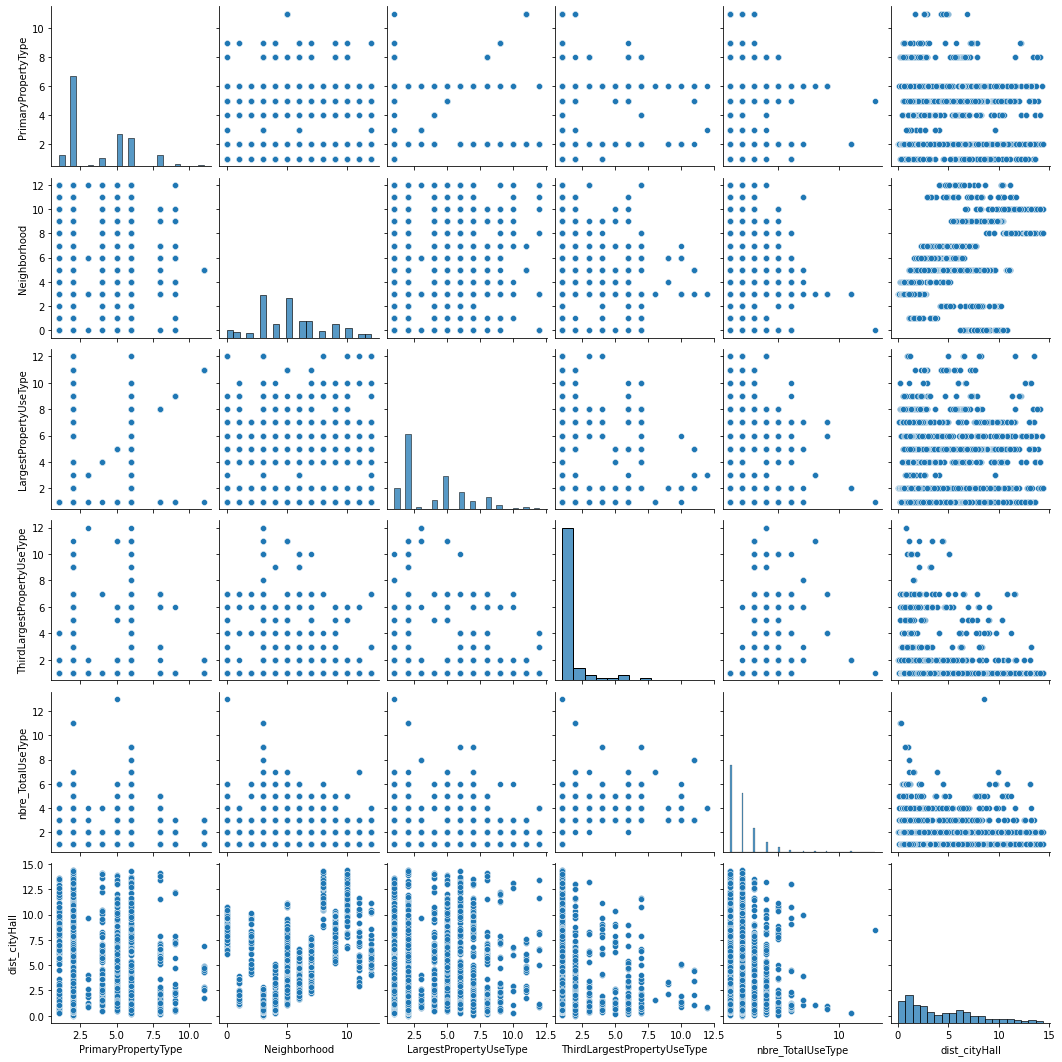

In [133]:
#afficher le pairplot des features corrélées
sns.pairplot(small_df[corr_features])

### Remarque:  
Nous remarquons qu'il n'y a pas de relation de linéarité entre les variables, on ne peut pas donc employer un modèle linéaire pour la prédiction. 

## 4. Analyse des Composantes Principales (ACP)
### 4.1. Cercle de corrélations
**Première statégie: avec suppression des NaN** 

In [134]:
#importe le module PCA
from sklearn.decomposition import PCA
import math

In [135]:
#imputer les nans avec std

from sklearn.impute import SimpleImputer

df= small_df
features = df.columns
imputer = SimpleImputer(strategy='mean')
imputer.fit(df)
imputed_df = imputer.transform(df.values)
print(imputed_df)

[[1.00000000e+00 8.00000000e+00 6.59000030e+08 ... 1.00000000e+00
  8.80000000e+01 1.00212075e+00]
 [1.00000000e+00 8.00000000e+00 6.59000220e+08 ... 3.00000000e+00
  1.90000000e+01 9.33027948e-01]
 [1.00000000e+00 8.00000000e+00 6.59000475e+08 ... 3.00000000e+00
  4.60000000e+01 1.09463530e+00]
 ...
 [2.00000000e+00 2.00000000e+00 1.79450115e+09 ... 3.00000000e+00
  4.20000000e+01 4.07244279e+00]
 [2.00000000e+00 6.00000000e+00 7.88360316e+09 ... 5.00000000e+00
  2.70000000e+01 8.54322945e+00]
 [2.00000000e+00 6.00000000e+00 7.85700203e+09 ... 5.00000000e+00
  7.80000000e+01 7.74638461e+00]]


In [136]:
#standardiser notre dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(imputed_df)
df_scaled.shape

(3090, 18)

In [137]:
#verifier s'il n'y a plus de nan
print(np.isnan(np.sum(df_scaled)))

False


In [138]:
from sklearn.decomposition import PCA
#Choisir un modele avec deux dimensions
pca=PCA(n_components=3)
#entrainer notre modèle et l'utiliser pour transformer les données
df_reduced = pca.fit_transform(df_scaled)
pcs = pca.components_

In [139]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                      plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            an = np.linspace(0, 2 * np.pi, 100)  # Add a unit circle for scale
            plt.plot(np.cos(an), np.sin(an))
            plt.axis('equal')

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

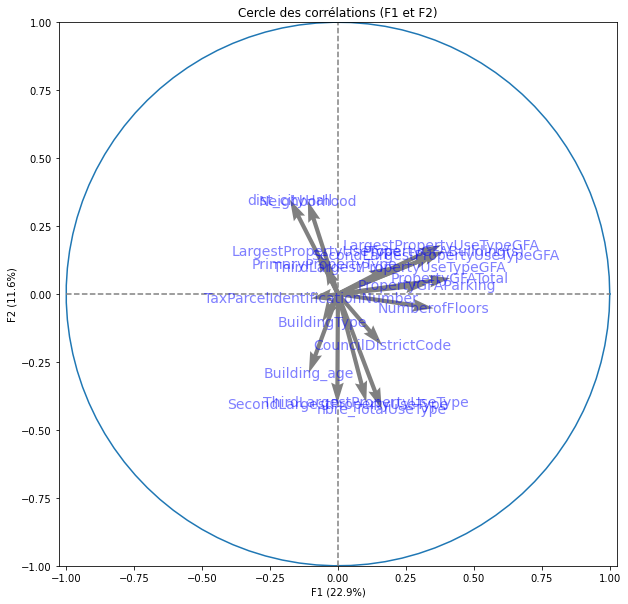

In [140]:
display_circles(pcs, 3, pca, [(0,1)], labels = np.array(features))

### Conclusion:  
les deux variables synthétiques qu'on peut déduire sont:  
- F1 (10.6%): NumberOfFloors, PropertyGFAParking, PropertyGFATotal, 'ThirdLargestPropertyUseTypeGFA','LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'PropertyGFABuilding(s)' 
- F2 (21.3 %) : BuildingType', 'PrimaryPropertyType', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'nbre_TotalUseType', 'Building_age', 'Latitude', 'Longitude'  

--> Nous remarquons que l'axe de F1 présente principalement les surfaces des batiments. L'axe de F2 reflète principalement les types des batiments et leurs localisation. 

**Deuxième stratégie: suppression des NaNs**

In [141]:
#taille de df avant suppression des NaNs
small_df.shape

(3090, 18)

In [142]:
small_df.columns

Index(['BuildingType', 'PrimaryPropertyType', 'TaxParcelIdentificationNumber',
       'CouncilDistrictCode', 'Neighborhood', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'nbre_TotalUseType', 'Building_age', 'dist_cityHall'],
      dtype='object')

In [143]:
small_df = small_df.rename(columns={"PropertyGFABuilding(s)": "PropertyGFABuilding"})

In [144]:
small_df.columns

Index(['BuildingType', 'PrimaryPropertyType', 'TaxParcelIdentificationNumber',
       'CouncilDistrictCode', 'Neighborhood', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'nbre_TotalUseType', 'Building_age', 'dist_cityHall'],
      dtype='object')

In [145]:
#supprimer tout les NaN
cleaned_nan_df=small_df[small_df.BuildingType.notnull()&small_df.PrimaryPropertyType.notnull()&small_df.TaxParcelIdentificationNumber.notnull()&small_df.CouncilDistrictCode.notnull()\
                       &small_df.Neighborhood.notnull()&small_df.NumberofFloors.notnull()&small_df.PropertyGFATotal.notnull()&small_df.PropertyGFAParking.notnull()\
                       &small_df.PropertyGFABuilding.notnull()&small_df.LargestPropertyUseType.notnull()&small_df.LargestPropertyUseTypeGFA.notnull()\
                       &small_df.SecondLargestPropertyUseType.notnull()&small_df.SecondLargestPropertyUseTypeGFA.notnull()&small_df.ThirdLargestPropertyUseType.notnull()\
                       &small_df.ThirdLargestPropertyUseTypeGFA.notnull()&small_df.nbre_TotalUseType.notnull()&small_df.Building_age.notnull()&small_df.dist_cityHall.notnull()
                       ]
cleaned_nan_df.shape

(3090, 18)

In [151]:
cleaned_nan_df.LargestPropertyUseTypeGFA = cleaned_nan_df.LargestPropertyUseTypeGFA.astype(float)
cleaned_nan_df.SecondLargestPropertyUseTypeGFA= cleaned_nan_df.SecondLargestPropertyUseTypeGFA.astype(float)
cleaned_nan_df.NumberofFloors= cleaned_nan_df.NumberofFloors.astype(float)
cleaned_nan_df.PropertyGFAParking= cleaned_nan_df.PropertyGFAParking.astype(float)
cleaned_nan_df.PropertyGFABuilding= cleaned_nan_df.PropertyGFABuilding.astype(float)
cleaned_nan_df.ThirdLargestPropertyUseTypeGFA= cleaned_nan_df.ThirdLargestPropertyUseTypeGFA.astype(float)

In [152]:
cleaned_nan_df =cleaned_nan_df[~cleaned_nan_df.isin([np.nan, np.inf, -np.inf]).any(1)]
cleaned_nan_df.shape

(661, 18)

In [153]:
#standardiser le dataset
cleaned_nan_df_scaled = scaler.fit_transform(cleaned_nan_df)


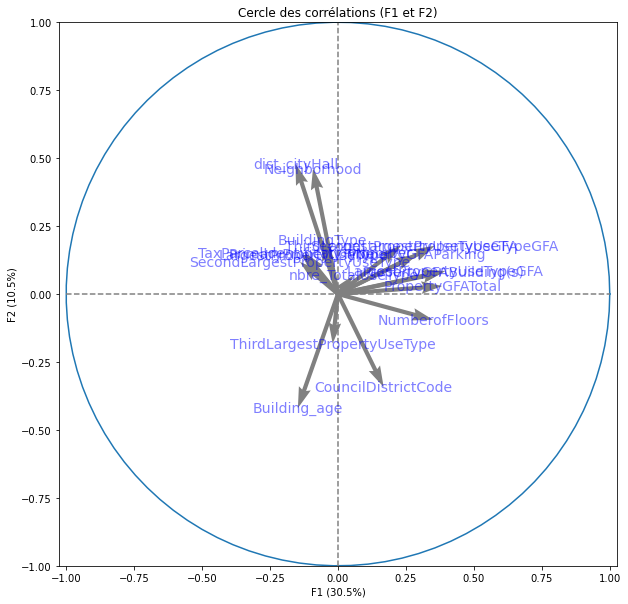

In [154]:
cleaned_nan_reduced = pca.fit_transform(cleaned_nan_df_scaled)
new_pcs = pca.components_
display_circles(new_pcs, 2, pca, [(0,1)], labels = np.array(features))

#### Interprétation  
On remarque que pour les deux stratégies, l'inertie totale n'est pas suffisante (inférieur à 85%) pour bien représenter les données: 
- stratégie 1 (avec imputation de NaN): 22.9% de l'énertie totale est associée à F1 et 11,6 % à F2 --> 34.5% d'inertie cumulée
- stratégie 2 (avec suppression des NaNs): 30.5% de l'énertie totale est associée à F1 et 10.5% à  F2 --> 41% d'inertie cumulée  
--> Dans les deux stratégies, le premier plan factoriel représente moins de 50% de l'énertie totale. On considère que c'est pas suffisant. 
--> nous allons utiliser l'éboulis des valeurs propres.: un diagramme qui indique le pourcentage de l'énertie totale associée à chaque axe.



## 4.2. Eboulis des valeurs propres

Nous cherchons le nombre de variables idéal pour conserver entre 90% et 95% de la variance de données.  
**1ère approche: compression des composantes avec les variables codées**

In [ ]:
#Nous allons nous baser 
cleaned_nan_df_scaled.shape

In [ ]:
#J'ai considéré le dataframe après suppression des NaNs pour faire ACP
#entrainer le modèle avec le même nombre de composantes que dans df
model = PCA(n_components=18)
cleaned_nan_reduced = model.fit_transform(cleaned_nan_df_scaled)

In [ ]:
#examiner quelle est le pourcentage de variance préservée par chaque de nos composantes
plt.plot(np.cumsum(model.explained_variance_ratio_))

In [ ]:
#pour trouver exactement le nombre de composantes nécessaire pour atteindre 90% de 
np.argmax(np.cumsum(model.explained_variance_ratio_)>0.9)

#### Interprétation:  
C'est à partir de la 11ème composante principale que l'on atteint 90% de la variance de notre modèle.  
Il ne reste plus qu'a ré-entrainer notre modèle PCA avec nbre de composante =11 et comme ça on est sûre qu'on a réduit la dimension à la meilleur valeur tout en gardant 90% de l'information de notre dataset. 

In [ ]:
model = PCA(n_components=11)
cleaned_nan_reduced = model.fit_transform(cleaned_nan_df_scaled)

**2ème approche: sans les variables codées** 

In [155]:
small_df.columns

Index(['BuildingType', 'PrimaryPropertyType', 'TaxParcelIdentificationNumber',
       'CouncilDistrictCode', 'Neighborhood', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'nbre_TotalUseType', 'Building_age', 'dist_cityHall'],
      dtype='object')

In [156]:
small_df.head()

,BuildingType,PrimaryPropertyType,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,nbre_TotalUseType,Building_age,dist_cityHall
0,1.0,8,659000030,7,3.0,12.0,4.946619,0,88434,8,88434.0,1,NAN,1,NAN,1,88,1.002121
1,1.0,8,659000220,7,3.0,11.0,5.015217,15064,88502,8,83880.0,1,15064.0,3,4622.0,3,19,0.933028
2,1.0,8,659000475,7,3.0,41.0,5.983171,0,961990,8,757243.0,1,100000.0,7,0.0,3,46,1.094635
3,1.0,8,659000640,7,3.0,10.0,4.787602,0,61320,8,61320.0,1,NAN,1,NAN,1,89,1.138105
4,1.0,8,659000970,7,3.0,18.0,5.078783,12460,107430,8,123445.0,1,68009.0,7,0.0,3,35,1.275670


In [158]:
small_df_exceptCoding= small_df[['TaxParcelIdentificationNumber','CouncilDistrictCode','NumberofFloors','PropertyGFATotal',\
                                'PropertyGFAParking', 'PropertyGFABuilding','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA',\
                                'ThirdLargestPropertyUseTypeGFA','Building_age', 'dist_cityHall']]

In [159]:
small_df_exceptCoding.shape

(3090, 11)

In [165]:
small_df_exceptCoding.LargestPropertyUseTypeGFA = small_df_exceptCoding.LargestPropertyUseTypeGFA.astype(float)
small_df_exceptCoding.SecondLargestPropertyUseTypeGFA= small_df_exceptCoding.SecondLargestPropertyUseTypeGFA.astype(float)
small_df_exceptCoding.NumberofFloors= small_df_exceptCoding.NumberofFloors.astype(float)
small_df_exceptCoding.PropertyGFAParking= small_df_exceptCoding.PropertyGFAParking.astype(float)
small_df_exceptCoding.PropertyGFABuilding= small_df_exceptCoding.PropertyGFABuilding.astype(float)
small_df_exceptCoding.ThirdLargestPropertyUseTypeGFA= small_df_exceptCoding.ThirdLargestPropertyUseTypeGFA.astype(float)

In [166]:
small_df_exceptCoding = small_df_exceptCoding[~small_df_exceptCoding.isin([np.nan]).any(1)]
small_df_exceptCoding.shape

(661, 11)

In [167]:
df_scaled = scaler.fit_transform(small_df_exceptCoding)

In [168]:
model = PCA(n_components=11)
df_scaled_reduced = model.fit_transform(df_scaled)

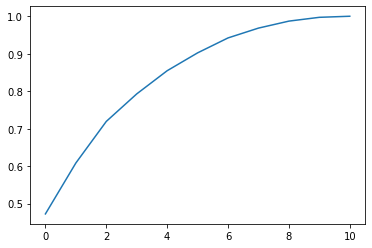

In [169]:
#examiner quelle est le pourcentage de variance préservée par chaque de nos composantes
plt.plot(np.cumsum(model.explained_variance_ratio_))

In [170]:
#pour trouver exactement le nombre de composantes nécessaire pour atteindre 90% de 
np.argmax(np.cumsum(model.explained_variance_ratio_)>0.9)

5